# Analysis of job seeker profiling tools using machine learning techniques and its impact on society

*by Tarek K. Ghanoum - Last update: 19.05.21*

**Topic Content**:

- Data Preparation
- Discriminational analysis
- Exploratory Data Analysis
- Feature selection & Analysis
- Hyperparameter tuning
- Model interpretability
- Discriminational adjustment

# Data Preparation

**Steps to preprocess the data**


Step 1: Import data

Step 2: Translation of columns and rows

Step 3: Rearrange columns and variable type

Step 4: Handling Missing Data (Remove duplication rows, Impute missing values, Eliminating columns)

## Import data

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("classic")
sns.set(style ='darkgrid')

random_seed_val = 5

In [ ]:
df = pd.read_excel("data.xlsx") #Screening-tool data
kk = pd.read_csv('kommunekoder.csv', sep=';') #Municipality codes and names
num_convo = pd.read_csv('samtale.csv', sep=';') #Number of conversations

## Translation of columns and rows

In [ ]:
df.columns.values

array(['id', 'startdt', 'slutdt', 'prof_varighed', 'prof_mvar', 'koen',
       'foeddt', 'prof_og_ydelse', 'prof_forsorg_grad',
       'prof_forsorg_grad_5', 'prof_per_grad', 'prof_per_grad_5',
       'prof_dp_grad', 'prof_dp_grad_5', 'prof_kth_grad_j',
       'prof_kth_grad_a', 'prof_kth_grad', 'prof_sar_grad',
       'prof_syg_grad', 'prof_reva_grad', 'prof_led_grad',
       'prof_fle_grad', 'prof_fop_grad', 'prof_res_grad', 'prof_job_grad',
       'prof_kty_grad', 'prof_int_grad', 'prof_udh_grad',
       'prof_kth_grad_j_5', 'prof_kth_grad_a_5', 'prof_kth_grad_5',
       'prof_sar_grad_5', 'prof_syg_grad_5', 'prof_reva_grad_5',
       'prof_led_grad_5', 'prof_fle_grad_5', 'prof_fop_grad_5',
       'prof_res_grad_5', 'prof_job_grad_5', 'prof_kty_grad_5',
       'prof_int_grad_5', 'prof_udh_grad_5', 'komnr', 'oprind',
       'prof_ak_varighed', 'prof_a_kasse_gruppe', 'alder', 'dimittend',
       'akasse', 'prof_branche', 'prof_grad_12', 'prof_grad_36',
       'prof_loen', 'prof_loen_m

In [ ]:
df = df.rename(columns={
    'startdt':'start',
    'slutdt':'end',
    'prof_varighed':'duration',
    'prof_mvar':'target',
    'koen':'gender',
    'foeddt':'birthday',
    'prof_og_ydelse':'public_support_type',
    'prof_forsorg_grad':'sd_all_12',
    'prof_forsorg_grad_5':'sd_all_60',
    'prof_per_grad':'per_12',
    'prof_per_grad_5':'per_60',
    'prof_dp_grad':'dp_12',
    'prof_dp_grad_5':'dp_60',
    'prof_kth_grad_j':'kth_12',
    'prof_kth_grad_a':'kth_12_a',
    'prof_kth_grad':'kth_12_b',
    'prof_sar_grad':'sar_12', 
    'prof_syg_grad':'sygedp_12',
    'prof_reva_grad':'rev_12',
    'prof_led_grad':'led_12',
    'prof_fle_grad':'fleks_12',
    'prof_fop_grad':'fop_12',
    'prof_res_grad':'res_12',
    'prof_job_grad':'job_12',
    'prof_kty_grad':'kty_12',
    'prof_int_grad':'int_12',
    'prof_udh_grad':'udh_12',
    'prof_kth_grad_j_5':'kth_60',
    'prof_kth_grad_a_5':'kth_60_a',
    'prof_kth_grad_5':'kth_60_b',
    'prof_sar_grad_5':'sar_60',
    'prof_syg_grad_5':'sygedp_60',
    'prof_reva_grad_5':'rev_60',
    'prof_led_grad_5':'led_60',
    'prof_fle_grad_5':'fleks_60',
    'prof_fop_grad_5':'fop_60',
    'prof_res_grad_5':'res_60',
    'prof_job_grad_5':'job_60',
    'prof_kty_grad_5':'kty_60',
    'prof_int_grad_5':'int_60',
    'prof_udh_grad_5':'udh_60',
    'komnr':'municipality',
    'oprind':'origin',
    'prof_ak_varighed':'unemployment_fund_duration',
    'prof_a_kasse_gruppe':'unemployment_fund_type',
    'alder':'age',
    'dimittend':'graduate',
    'akasse':'unemployment_fund',
    'prof_branche':'industry',
    'prof_grad_12':'employment_rate_12',
    'prof_grad_36':'employment_rate_36',
    'prof_loen':'aggregate_wage',
    'prof_loen_miss':'aggregate_wage_missing_values',
    'prof_civ_par':'parents_marital_status',
    'prof_forsoerg':'provider',
    'prof_antal_forsoerger':'provider_count',
    'prof_civ':'marital_status',
    'prof_pes':'partner_occupational_status',
    'prof_afb':'age_first_child',
    'prof_neg_liv':'negative_life_events',
    'prof_flyt':'relocations_5',
    'prof_ink_par':'average_income_parents',
    'prof_gat':'average_employment_period',
    'prof_Faerdigdato':'completion_of_questionnaire',
    'prof_spm_01':'q1', 'prof_spm_01A':'q1b', 'prof_spm_01C':'q1a',
    'prof_spm_02':'q2', 'prof_spm_03A':'q3a', 'prof_spm_03B':'q3b', 'prof_spm_03C':'q3',
    'prof_spm_04A':'q4', 'prof_spm_04B':'q4a', 'prof_spm_05A':'q5', 'prof_spm_05B':'q5a',
    'prof_spm_06A':'q6b', 'prof_spm_06B':'q6', 'prof_spm_06C':'q6a', 'prof_spm_07A':'q7a',
    'prof_spm_07B':'q7', 'prof_spm_08A':'q8a', 'prof_spm_08B':'q8b', 'prof_spm_08C':'q8c',
    'prof_spm_08D':'q8d', 'prof_spm_08E':'q8e', 'prof_spm_08F':'q8f', 'prof_spm_09A':'q9a',
    'prof_spm_09B':'q9b', 'prof_spm_09C':'q9c', 'prof_spm_09D':'q9d', 'prof_spm_09E':'q9e',
    'prof_spm_09F':'q9f', 'prof_spm_10A':'q10a', 'prof_spm_10':'q10',
    'prof_load_date':'load_date',
    'hojeste_udd':'education',
})

## Rearrange columns and variable type

I wanna make sure to place the target variable ['prof_mvar'] in the start of the dataframe, which makes it easier to assign features and target variables latter on:

In [ ]:
df.columns.values

array(['id', 'start', 'end', 'duration', 'target', 'gender', 'birthday',
       'public_support_type', 'sd_all_12', 'sd_all_60', 'per_12',
       'per_60', 'dp_12', 'dp_60', 'kth_12', 'kth_12_a', 'kth_12_b',
       'sar_12', 'sygedp_12', 'rev_12', 'led_12', 'fleks_12', 'fop_12',
       'res_12', 'job_12', 'kty_12', 'int_12', 'udh_12', 'kth_60',
       'kth_60_a', 'kth_60_b', 'sar_60', 'sygedp_60', 'rev_60', 'led_60',
       'fleks_60', 'fop_60', 'res_60', 'job_60', 'kty_60', 'int_60',
       'udh_60', 'municipality', 'origin', 'unemployment_fund_duration',
       'unemployment_fund_type', 'age', 'graduate', 'unemployment_fund',
       'industry', 'employment_rate_12', 'employment_rate_36',
       'aggregate_wage', 'aggregate_wage_missing_values',
       'parents_marital_status', 'provider', 'provider_count',
       'marital_status', 'partner_occupational_status', 'age_first_child',
       'negative_life_events', 'relocations_5', 'average_income_parents',
       'average_employment_peri

In [ ]:
df = df[['target', 'id', 'start', 'end', 'duration', 'gender', 'birthday',
       'public_support_type', 'sd_all_12', 'sd_all_60', 'per_12',
       'per_60', 'dp_12', 'dp_60', 'kth_12', 'kth_12_a', 'kth_12_b',
       'sar_12', 'sygedp_12', 'rev_12', 'led_12', 'fleks_12', 'fop_12',
       'res_12', 'job_12', 'kty_12', 'int_12', 'udh_12', 'kth_60',
       'kth_60_a', 'kth_60_b', 'sar_60', 'sygedp_60', 'rev_60', 'led_60',
       'fleks_60', 'fop_60', 'res_60', 'job_60', 'kty_60', 'int_60',
       'udh_60', 'municipality', 'origin', 'unemployment_fund_duration',
       'unemployment_fund_type', 'age', 'graduate', 'unemployment_fund',
       'industry', 'employment_rate_12', 'employment_rate_36',
       'aggregate_wage', 'aggregate_wage_missing_values',
       'parents_marital_status', 'provider', 'provider_count',
       'marital_status', 'partner_occupational_status', 'age_first_child',
       'negative_life_events', 'relocations_5', 'average_income_parents',
       'average_employment_period', 'completion_of_questionnaire', 'q1',
       'q1b', 'q1a', 'q2', 'q3a', 'q3b', 'q3', 'q4', 'q4a', 'q5', 'q5a',
       'q6b', 'q6', 'q6a', 'q7a', 'q7', 'q8a', 'q8b', 'q8c', 'q8d', 'q8e',
       'q8f', 'q9a', 'q9b', 'q9c', 'q9d', 'q9e', 'q9f', 'q10a', 'q10',
       'prof_spm_dum_hist', 'load_date', 'education', 'partition_kolonne',
       'random_uni', 'run_date', 'random_partition_kolonne']]

## Handling Missing Data

<AxesSubplot:>

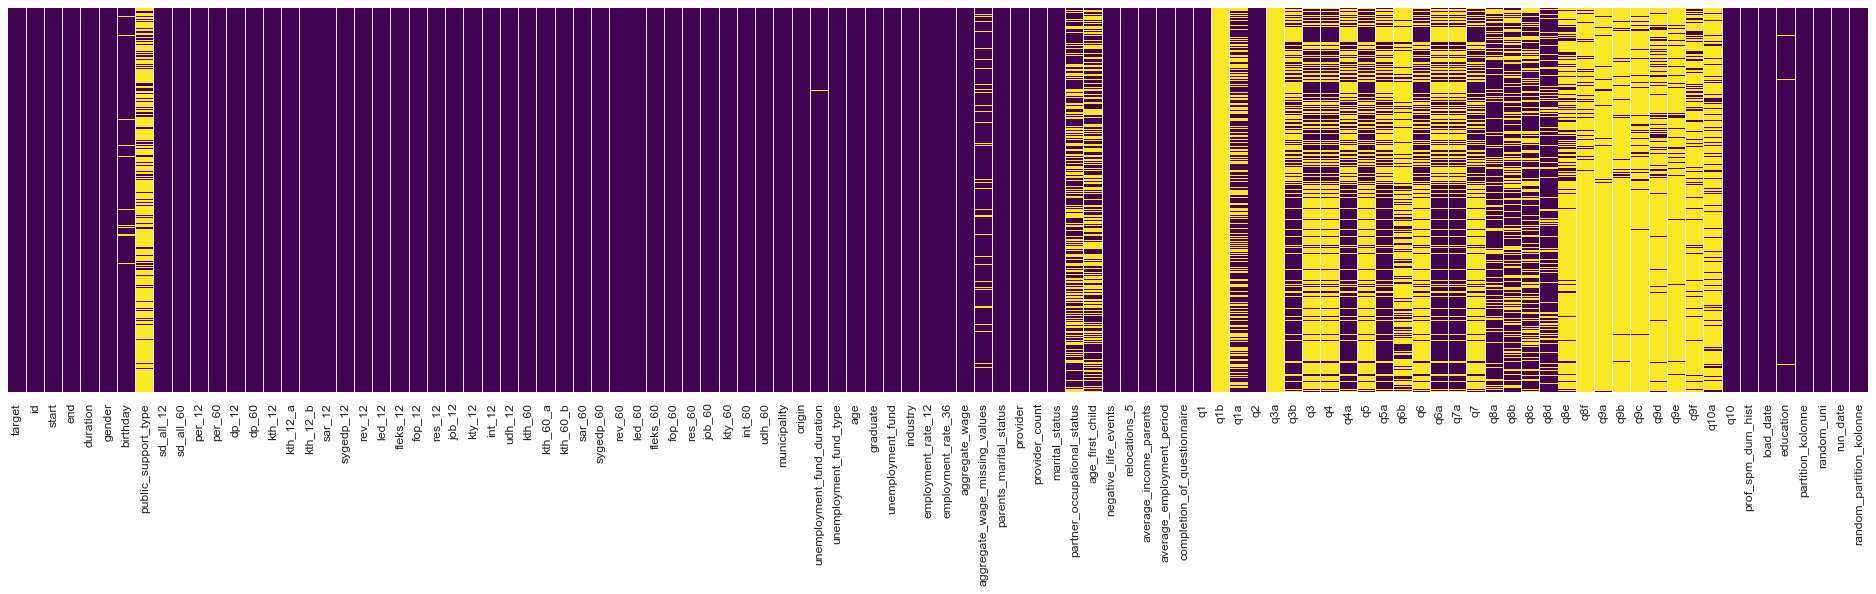

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

### 1) HTML rapport

Given the large number of features, I choose to create an HTML rapport with the sweetviz auto-visualization library, which can help me analyze the missing data:

In [ ]:
import sweetviz as sv

#EDA using Autoviz
#report_before = sv.analyze(df)

#Saving results to HTML file
#report_before.show_html('report_before.html')

### 2) Remove duplicate rows

In [ ]:
df.shape

(164322, 102)

In [ ]:
df = df.drop_duplicates()
df.shape

(164322, 102)

### 3) Impute missing values

**Gender:**

>From the data description recieved I know that 1 is for males and 0 is for females.
I fill in all the empyt gaps with a 0 to get the female values:

In [ ]:
df['gender'] = df['gender'].fillna(0)
df = df[df.gender != 9]

**Support degree:**

In [ ]:
df.iloc[:,8:41] = df.iloc[:,8:41].fillna(0)

**Unemployment_fund_duration:**

>In this feature we have two problems; missing and negative values. The missing values have been filled with
the mean while the nagative value (-1786) seems to be a typo, so I convert it to a positive value.

In [ ]:
df['unemployment_fund_duration'] = df['unemployment_fund_duration'].fillna(round(df['unemployment_fund_duration'].mean()))

df['unemployment_fund_duration'] = df['unemployment_fund_duration'].map(lambda a: abs(a))

**Employment_rate_12 & 36:**

>My first thought when looking at the data was to fill in missing values with the mean, but by looking
at the pattern between 12 and 36, I noticed that some people had 0 at 12 but >0 at 36. So, given
that it isint a mistake of any sort I decided to fill the missing values with 0:

In [ ]:
df['employment_rate_12'] = df['employment_rate_12'].fillna(0)
df['employment_rate_36'] = df['employment_rate_36'].fillna(0)

**Aggregate_wage_missing_values:**

>Given that we don't have heavy outliers a simple mean was enough to fill in the missing values:

In [ ]:
df['aggregate_wage_missing_values'] = df['aggregate_wage_missing_values'].fillna(df['aggregate_wage_missing_values'].mean())

**Partner_occupational_status:**

>The category 0 will cover missing information or no partner:

In [ ]:
df['partner_occupational_status'] = df['partner_occupational_status'].fillna(0)

**Age_first_child:**

>We have a large number of missing values here which either implies no info or no childre.
Assuming that people will behave like the general public I choose to assign the missing a mean
This is quite interesting given that they might be assigned an age which they havent even fulfilled yet

In [ ]:
df['age_first_child'] = df['age_first_child'].fillna(round(df['age_first_child'].mean()))

**Q1a:**

>I will add the category 'other' which among others covers military and police

In [ ]:
df['q1a'] = df['q1a'].fillna('Other')

**Q2:**

>Given that we have a very low amount of missing values I have chosen to assign them the most frequent value:

In [ ]:
df['q2'] = df['q2'].fillna('Inden for 3 måneder')
df.loc[df['q2'] == 'Jeg forventer snart at gå på barsel, efterløn eller pension', 'q2'] = 'Jeg forventer snart at gå på efterløn eller pension'

**Q3:**

>Based on former answers on question q6a I was able to fill in some of the missing values in q3.
The rest were filled out wit the most frequent answer in q3:

In [ ]:
df.loc[df['q6a'] == "Jeg har indtil nu været selvstændigt erhvervsdrivende", 'q3'] = "Jeg har indtil nu været selvstændig erhvervsdrivende"
df.loc[df['q6a'] == "Jeg har ikke haft et job (fx hvis du har modtaget SU, syge- eller barselsdagpenge mv.", 'q3'] = "Jeg har ikke haft et job (Fx hvis du har modtaget syge- eller barselsdagpenge mv., eller har afbrudt din uddannelse)"
df['q3'] = df['q3'].fillna("Jeg er blevet opsagt")

**Q10:**

>Given that 'No' takes up 64% of the answers and that we only have <1% missing values, I choose to label the missing data with the most frequent answer:

In [ ]:
df['q10'] = df['q10'].fillna("Nej")

**Q10a:**



In [ ]:
df.loc[df['q10a'] == "Økonomiske begrænsninger", 'q10a'] = "Økonomiske forhold"
df.loc[df['q10a'] == "Psykiske begrænsninger", 'q10a'] = "Mit psykiske helbred"
df.loc[df['q10a'] == "Personlige- eller sociale begrænsninger", 'q10a'] = "Personlige- eller sociale forhold"
df.loc[df['q10a'] == "Fysiske begrænsninger", 'q10a'] = "Mit fysiske helbred"
df.loc[df['q10a'] == "Læse-, stave- eller regnefærdigheder", 'q10a'] = "Manglende læse- stave eller regnefærdigheder"
df.loc[df['q10a'] == "Andet, angiv gerne", 'q10a'] = "Andet"
df['q10a'] = df['q10a'].fillna("Andet")

**Education:**

>Given that we do not have a major frequent educational level, and only have around 1% missing data, I choose to remove them so I do not risk contaminating by filling missing values with random answers.

In [ ]:
df.dropna(subset=['education'], inplace=True)

#### Merge datasets

**Municipality:**

>We have 98 unique values in the municipality column. In order to avoid overfitting I choose to merge in another dataset and group the different municipalities in 8 categories, which are referred to as regional labour market councils (RAR).

>The eight regional labour market councils consist of:

- RAR Northern Jutland: 11 municipalities
- RAR West Jutland: 7 municipalities
- RAR Eastern Jutland: 12 municipalities
- RAR Southern Jutland: 13 municipalities
- RAR Funnen: 9 municipalities
- RAR Zealand: 17 municipalities
- RAR Capital:28 municipalities
- RAR Bornholm: 1 municipality

In [ ]:
#Start by limiting the dataset to the relevant columns:
kk = kk.loc[:, ['komnr', 'komnr_t', 'rar_t']]

#I now merge and use the mincipality codes as key:
df = df.merge(kk, how='left', left_on='municipality', right_on='komnr')

#Rename the new column
df = df.rename(columns={'rar_t':'rar'})
df = df.rename(columns={'komnr_t':'municipality_name'})

#Result:
df.loc[:5, ['municipality', 'municipality_name', 'rar']]

municipality municipality_name              rar
0           746       Skanderborg   RAR Østjylland
1           851           Aalborg  RAR Nordjylland
2           482         Langeland          RAR Fyn
3           671            Struer  RAR Vestjylland
4           175           Rødovre  RAR Hovedstaden
5           851           Aalborg  RAR Nordjylland

#### Feature Engineering

In [ ]:
df['dp'] = np.where((df['dp_12'] != 0) | (df['dp_60'] != 0), 1, 0)

df['kth'] = np.where(
    (df['kth_12'] != 0) | 
    (df['kth_12_a'] != 0) |
    (df['kth_12_b'] != 0) |
    (df['kth_60'] != 0) | 
    (df['kth_60_a'] != 0) |
    (df['kth_60_b'] != 0),
    1, 0)

df['sygedp'] = np.where((df['sygedp_12'] != 0) | (df['sygedp_60'] != 0), 1, 0)

df['rev'] = np.where((df['rev_12'] != 0) | (df['rev_60'] != 0), 1, 0)

df['job'] = np.where((df['job_12'] != 0) | (df['job_60'] != 0), 1, 0)

df['kty'] = np.where((df['kty_12'] != 0) | (df['kty_60'] != 0), 1, 0)

df['udh'] = np.where((df['udh_12'] != 0) | (df['udh_60'] != 0), 1, 0)

In [ ]:
df_eda_1 = df.copy() #Used later for EDA

### 4) Eliminating columns

In [ ]:
df.drop([
    'start',
    'end',
    'duration',
    'public_support_type',
    'per_12',
    'per_60',
    'sar_12',
    'sar_60',
    'led_12',
    'led_60',
    'fleks_12',
    'fleks_60',
    'fop_12',
    'fop_60',
    'res_12',
    'res_60',
    'int_12',
    'int_60',
    'municipality',
    'komnr',
    'unemployment_fund',
    'aggregate_wage',
    'completion_of_questionnaire',
    'q1b',
    'q3a',
    'q3b',
    'q4a',
    'q5a',
    'q6a',
    'q6b',
    'q7a',
    'prof_spm_dum_hist',
    'partition_kolonne',
    'random_uni',
    'run_date',
    'random_partition_kolonne',
    'birthday',
    'industry',
    'load_date',
    'education'
        ], axis=1, inplace=True)

Some features are removed based on knowledge from the workplace. These are features which add no value to the analysis given that the value is either outdated or useless given the context. Other features are removed because of the high number of missing values, which make them redundant.

In the following I add a simple comment regarding why I removed specific features:

**Public_Support_type:**

> The given support type is after the support period and would therefore be leaking information in the training if kept.

**Municipality:**

>As explained earlier, I choose to categorize the 98 unique municipalities into 9 categories (RAR) to avoid overfitting.

**Birthday:**

> We have some missing birthdays, but given that I have no missing values in the 'age' column I simply choose to use the 'age' column which gives me the same information.

**Unemployment_fund:**

>Given that we have 27 different unemployment funds, which are already categorized in the column unemployment_fund_type, I would rather remove it to avoid overfitting.

**Industry:**

> Given that our industry feature only has a single value (999999) it wouldn't add any value.

**Education:**

> Given that education has 1.995 unique values I remove it to avoid overfitting. Instead I rely on the answers to q1 and q1a which has categorized education.

I will now convert all string labels to numbers and create dummies for nominal categories:

In [ ]:
rar_mapping = {
    'RAR Fyn':'funnen',
    'RAR Hovedstaden':'capital',
    'RAR Nordjylland':'northern_jutland',
    'RAR Sjælland':'zealand',
    'RAR Sydjylland':'southern_jutland',
    'RAR Vestjylland':'west_jutland',
    'RAR Østjylland':'eastern_jutland',
    'Uoplyst':'no_info'
}

df['rar'] = df['rar'].map(rar_mapping)

#---------------------------------------------------------------------

gender_mapping = {
    0:'female',
    1:'male'
}

df['gender'] = df['gender'].map(gender_mapping)

#---------------------------------------------------------------------

origin_mapping = {
    1:'danish',
    2:'western_immigrant',
    3:'non_western_immigrant',
    4:'western_descendant',
    5:'non_western_descendant'
}

df['origin'] = df['origin'].map(origin_mapping)

#---------------------------------------------------------------------

unemployment_mapping = {
    0:'no_insurance',
    1:'LO',
    2:'FTF',
    3:'AC',
    4:'Other'
}

df['unemployment_fund_type'] = df['unemployment_fund_type'].map(unemployment_mapping)

#---------------------------------------------------------------------

graduate_mapping = {
    0:'yes',
    1:'no'
}

df['graduate'] = df['graduate'].map(graduate_mapping)

#---------------------------------------------------------------------

provider_mapping = {
    0:'no',
    1:'yes'
}

df['provider'] = df['provider'].map(provider_mapping)

#---------------------------------------------------------------------

negative_life_events_mapping = {
    0:'no',
    1:'yes'
}

df['negative_life_events'] = df['negative_life_events'].map(negative_life_events_mapping)

#---------------------------------------------------------------------

q1_mapping = {
    'Ved ikke':1,
    'Ikke gennemført folkeskole eller anden grundskole':2,
    'Folkeskole eller anden grundskole':3,
    'Gymnasial uddannelse (fx gymnasium, HF, studenterkursus, HHX eller HTX)':4,
    'Særlig tilrettelagt ungdomsuddannelse (STU)':5,
    'AMU-kurser':6,
    'TAMU, produktionsskole, kombinationsprojekt':7,
    'EGU (erhvervsgrunduddannelse)':8,
    'Erhvervsakademiuddannelse / kort videregående uddannelse (fx datamatiker eller klinisk tandteknikker)':9,
    'Erhvervsuddannelse - i skole eller mesterlære (fx murer, smed, frisør eller kontormedarbejder)':10,
    'Erhvervsuddannelse - i skole eller mesterlære – kun grundforløb; afbrudt eller delvist gennemført hovedforløb (fx murer, smed, frisør eller kontormedarbejder)':11,
    'Videregående voksenuddannelse (VVU)':12,
    'Professionsbachelor / mellemlang videregående uddannelse (fx pædagog, sygeplejerske, lærer)':13,
    'Kunstnerisk uddannelse (fx designer, billedkunster, skuespiller)':14,
    'Diplomuddannelse':15,
    'Udenlandsk eksamen som ikke er godkendt i Danmark':16,
    'Politi og forsvar (fx politibetjent, professionel soldat, flyveleder, pilot)':17,
    'Universitetsuddannelse / lang videregående uddannelse (bachelor, kandidat, phd.)':18,
    'Masteruddannelse':19
}

df['q1'] = df['q1'].map(q1_mapping)

#Inspiration:
#https://ufm.dk/uddannelse/anerkendelse-og-dokumentation/dokumentation/kvalifikationsrammer/typer/samlet-oversigt

#---------------------------------------------------------------------

q1a_mapping = {
    'Humanistiske, religiøse og æstetiske uddannelser':1,
    'Ikke erhvervsrettede uddannelser (fx HF, STX)':2,
    'Industri- og håndværkstekniske uddannelser':3,
    'Industri- og håndværkstekniske uddannelser (fx HTX)':4,
    'Jordbrugs-, fiskeri- og levnedsmiddeluddannelser':5,
    'Naturvidenskabelige uddannelser':6,
    'Other':7,
    'Pædagogiske uddannelser':8,
    'Samfunds-, kontor- og handelsuddannelser':9,
    'Samfunds-, kontor- og handelsuddannelser (fx HHX)':10,
    'Sundhedsuddannelser':11,
    'Transport- og kommunikationstekniske uddannelser':12,
    'Uddannelser vedrørende offentlig sikkerhed mv.':13
}

df['q1a'] = df['q1a'].map(q1a_mapping)

#---------------------------------------------------------------------

q2_mapping = {
    'Jeg har fået nyt arbejde, men er ikke startet endnu':1,
    'Inden for 1 måned':2,
    'Inden for 3 måneder':3,
    'Inden for 6 måneder':4,    
    'Der går mere end 6 måneder':5,
    'Jeg forventer snart at gå på barsel':6,
    'Jeg forventer snart at gå på efterløn eller pension':7,
    'Ved ikke':8
}

df['q2'] = df['q2'].map(q2_mapping)

#---------------------------------------------------------------------

q3_mapping = {
    'Andet':1,
    'Jeg er blevet opsagt':2,
    'Jeg er dimittend':3,
    'Jeg er midlertidigt hjemsendt':4,
    'Jeg har ikke haft et job (Fx hvis du har modtaget syge- eller barselsdagpenge mv., eller har afbrudt din uddannelse)':5,
    'Jeg har indtil nu været selvstændig erhvervsdrivende':6,
    'Jeg har selv sagt op':7
}

df['q3'] = df['q3'].map(q3_mapping)

#---------------------------------------------------------------------

q4_mapping = {
    'Jeg har vidst det i mindre end en uge':1,
    'Jeg har vidst det den seneste måned':2,
    'Jeg har vidst det de seneste tre måneder':3,
    'Jeg har vidst det de seneste seks måneder':4,
    'Jeg har vidst det i over seks måneder':5
}

df['q4'] = df['q4'].map(q4_mapping)

#---------------------------------------------------------------------

q5_mapping = {
    'Jeg har ikke søgt job':1,
    'Jeg har søgt 1 job':2,
    'Jeg har søgt 2-5 job':3,
    'Jeg har søgt over 5 job':4
}

df['q5'] = df['q5'].map(q5_mapping)

#---------------------------------------------------------------------

q6_mapping = {
    'Mine jobmuligheder er gode':1,
    'Mine jobmuligheder er nogenlunde gode':2,
    'Mine jobmuligheder er ikke så gode':3,
    'Mine jobmuligheder er dårlige':4,
    'Ved ikke':5
}

df['q6'] = df['q6'].map(q6_mapping)

#---------------------------------------------------------------------

q7_mapping = {
    'Jeg ved ikke hvilke typer arbejde, jeg gerne vil have':1,
    'Jeg har en idé om hvilke type arbejde, jeg gerne vil have':2,
    'Jeg har nogle få, men uklare idéer om hvilke typer arbejde, jeg gerne vil have':3,
    'Jeg ved lige hvilket arbejde, jeg gerne vil have':4
}

df['q7'] = df['q7'].map(q7_mapping)

#---------------------------------------------------------------------

q8a_mapping = {
    'Bruger mit netværk (kontakter venner, familie, tidligere studie- eller arbejdskollegaer mv.)':1
}

df['q8a'] = df['q8a'].map(q8a_mapping)

#---------------------------------------------------------------------

q8b_mapping = {
    'Henvender mig personligt eller telefonisk til arbejdsgiver':1
}

df['q8b'] = df['q8b'].map(q8b_mapping)

#---------------------------------------------------------------------

q8c_mapping = {
    'Sender uopfordrede ansøgninger':1
}

df['q8c'] = df['q8c'].map(q8c_mapping)

#---------------------------------------------------------------------

q8d_mapping = {
    'Svarer på annoncer i aviser, blade, internet, mv.':1
}

df['q8d'] = df['q8d'].map(q8d_mapping)

#---------------------------------------------------------------------

q8e_mapping = {
    'Bruger sociale medier (Facebook, LinkedIn mv.)':1
}

df['q8e'] = df['q8e'].map(q8e_mapping)

#---------------------------------------------------------------------

q8f_mapping = {
    'Vikarbureau':1
}

df['q8f'] = df['q8f'].map(q8f_mapping)

#---------------------------------------------------------------------

q9a_mapping = {
    'Jeg overvejer at flytte':1
}

df['q9a'] = df['q9a'].map(q9a_mapping)

#---------------------------------------------------------------------

q9b_mapping = {
    'Jeg overvejer at gå ned i løn':1
}

df['q9b'] = df['q9b'].map(q9b_mapping)

#---------------------------------------------------------------------

q9c_mapping = {
    'Jeg overvejer at pendle langt':1
}

df['q9c'] = df['q9c'].map(q9c_mapping)

#---------------------------------------------------------------------

q9d_mapping = {
    'Jeg overvejer at skifte branche':1
}

df['q9d'] = df['q9d'].map(q9d_mapping)

#---------------------------------------------------------------------

q9e_mapping = {
    'Jeg overvejer at tage en anden uddannelse':1
}

df['q9e'] = df['q9e'].map(q9e_mapping)

#---------------------------------------------------------------------

q9f_mapping = {
    'Jeg overvejer ingen af de nævnte':1
}

df['q9f'] = df['q9f'].map(q9f_mapping)

#---------------------------------------------------------------------

q10_mapping = {
    'Ja':1,
    'Nej':2,
    'Ved ikke':3
}

df['q10'] = df['q10'].map(q10_mapping)

#---------------------------------------------------------------------

q10a_mapping = {
    'Alkohol- eller stofmisbrug':1,
    'Andet':2,
    'Manglende IT færdigheder':3,
    'Manglende læse- stave eller regnefærdigheder':4,
    'Mit fysiske helbred':5,
    'Mit psykiske helbred':6,
    'Personlige- eller sociale forhold':7,
    'Sprogbarrierer':8,
    'Økonomiske forhold':9
}

df['q10a'] = df['q10a'].map(q10a_mapping)

**Q8a-Q9f:**

>These questions gives the end user a choice of picking multiple answers. Given that we only have a single answer per column I choose to fill the empty values with 0:

In [ ]:
df.iloc[:,-23:-11] = df.iloc[:,-23:-11].fillna(0)

In the above I focused on numeration and translation. In the following step I will create dummy variables for the nominal features:

In [ ]:
df_eda_2 = df.copy() #Used later for EDA

l = [
    'gender',
    'origin',
    'rar',
    'unemployment_fund_type',
    'graduate',
    'parents_marital_status',
    'provider',
    'marital_status',
    'partner_occupational_status',
    'negative_life_events',
    'q1a',
    'q3',
    'q10',
    'q10a',
    'municipality_name'
]

df = pd.get_dummies(df, columns=l, dtype=int)

I have deliberatly waited with the removal of id numbers and municipality columns so I can use it in the next step of my analysis.
At this stage I can copy my results and remove the id feature. The convo dataset will be used in my analysis of the number of conversations - Discriminational analysis.

In [ ]:
convo = df.copy()

df.drop(['id'], axis=1, inplace=True)
df.drop(df.iloc[:, 133:], inplace = True, axis = 1) 

# Discriminational analysis

As part of my overall analysis I now take a dive into the data to see whether we have any basis for saying that people with non-danish origin has been discriminated against.

The way I approach this is by looking at the number of conversations each individual has with caseworkers. I set the 'origin danish' and 'gender male' baseline:

In [ ]:
convo = convo.loc[:, [
    'id',
    #'origin_danish', baseline
    'origin_western_immigrant', 
    'origin_non_western_immigrant', 
    'origin_western_descendant', 
    'origin_non_western_descendant',
    #'gender_female', baseline
    'gender_male',
    'q1', #education
    'graduate_yes', #Used to subset data
    'municipality_name_Frederiksberg',
    'municipality_name_Odense',
    'municipality_name_København',
    'municipality_name_Aarhus',
    'municipality_name_Aalborg',
    'municipality_name_Gentofte',
    'age'
]]

convo.head()

id  origin_western_immigrant  origin_non_western_immigrant  \
0  1110011602                         0                             0   
1  1110000431                         0                             0   
2  1110023772                         0                             0   
3  1110000876                         0                             0   
4  1110000969                         0                             0   

   origin_western_descendant  origin_non_western_descendant  gender_male  q1  \
0                          0                              0            0  18   
1                          0                              0            1  18   
2                          1                              0            1  15   
3                          0                              0            1  11   
4                          1                              0            0  13   

   graduate_yes  municipality_name_Frederiksberg  municipality_name_Odense  \
0             0                                0                         0   
1             1                                0                         0   
2             1                                0                         0   
3             0                                0                         0   
4             1                                0                         0   

   municipality_name_København  municipality_name_Aarhus  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   

   municipality_name_Aalborg  municipality_name_Gentofte  age  
0                          0                           0   24  
1                          1                           0   36  
2                          0                           0   29  
3                          0                           0   22  
4                          0                           0   36

Now I am ready to merge in the num_convo dataset that I imported in the beginning, which holds the number of conversations (column called 'sum') that each individual has had in the job center:

In [ ]:
#I now merge and use the id as key:
convo = convo.merge(num_convo, how='left', on='id')

#Result:
convo.head()

id  origin_western_immigrant  origin_non_western_immigrant  \
0  1110011602                         0                             0   
1  1110000431                         0                             0   
2  1110023772                         0                             0   
3  1110000876                         0                             0   
4  1110000969                         0                             0   

   origin_western_descendant  origin_non_western_descendant  gender_male  q1  \
0                          0                              0            0  18   
1                          0                              0            1  18   
2                          1                              0            1  15   
3                          0                              0            1  11   
4                          1                              0            0  13   

   graduate_yes  municipality_name_Frederiksberg  municipality_name_Odense  \
0             0                                0                         0   
1             1                                0                         0   
2             1                                0                         0   
3             0                                0                         0   
4             1                                0                         0   

   municipality_name_København  municipality_name_Aarhus  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   

   municipality_name_Aalborg  municipality_name_Gentofte  age   sum  
0                          0                           0   24  14.0  
1                          1                           0   36   6.0  
2                          0                           0   29  31.0  
3                          0                           0   22   5.0  
4                          0                           0   36  16.0

I check if we have any missing values and see that the number of conversations has some missing values, 3498 to be specific:

<AxesSubplot:>

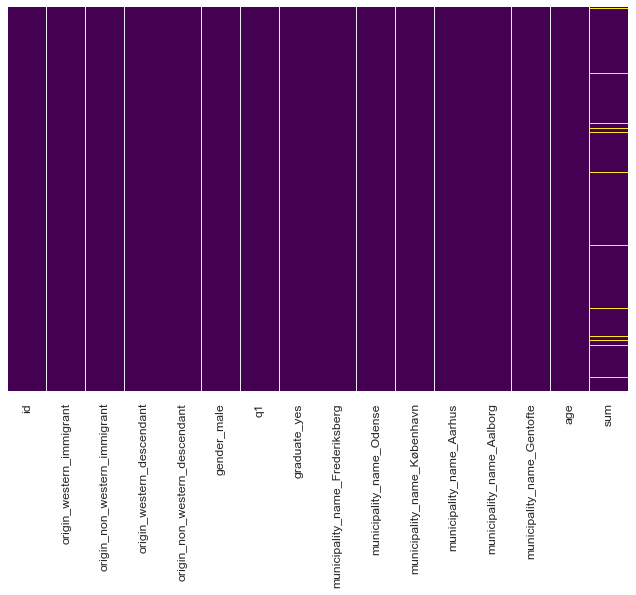

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(convo.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [ ]:
convo.isna().sum()

id                                    0
origin_western_immigrant              0
origin_non_western_immigrant          0
origin_western_descendant             0
origin_non_western_descendant         0
gender_male                           0
q1                                    0
graduate_yes                          0
municipality_name_Frederiksberg       0
municipality_name_Odense              0
municipality_name_København           0
municipality_name_Aarhus              0
municipality_name_Aalborg             0
municipality_name_Gentofte            0
age                                   0
sum                                3498
dtype: int64

In [ ]:
convo['sum'] = convo['sum'].fillna(round(convo['sum'].mean()))

In [ ]:
convo = convo.rename(columns={'sum':'target'})

### Overall 

Having prepared the data, I am now ready to perform my first analysis using a simple OLS.

The results indicate that people with 'origin_western_descendant' have had almost five more conversations than people with a danish origin. I do notice the low adjusted R-squared, which might indicate poor performance.

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

results = smf.ols('target ~ gender_male + origin_western_immigrant + origin_non_western_immigrant + origin_western_descendant +origin_non_western_descendant + q1 + age', data=convo).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     1770.
Date:                Wed, 19 May 2021   Prob (F-statistic):               0.00
Time:                        17:46:41   Log-Likelihood:            -6.4421e+05
No. Observations:              159087   AIC:                         1.288e+06
Df Residuals:                  159079   BIC:                         1.289e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

### Graduates

I now try to zoom in on specific backgrounds by analyzing graduates.

I now see that western descendant and non-western descendant get called into more conversations.

In [ ]:
convo2 = convo.copy()
#convo2 = convo2[convo2.graduate_yes==1]
#convo2 = convo2[convo2.gender_male==1]

convo2.groupby('origin_non_western_descendant', as_index=False).count().loc[:, 'id']

0    155408
1      3679
Name: id, dtype: int64

In [ ]:
results2 = smf.ols('target ~ origin_western_immigrant + origin_non_western_immigrant + origin_western_descendant +origin_non_western_descendant', data=convo2).fit()

# Inspect the results
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     293.7
Date:                Wed, 19 May 2021   Prob (F-statistic):          3.62e-252
Time:                        17:46:41   Log-Likelihood:            -6.4959e+05
No. Observations:              159087   AIC:                         1.299e+06
Df Residuals:                  159082   BIC:                         1.299e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

### Graduates in Frederiksberg

Based on my interviews, I choose to narrow down even further and focus on specific municipalities. In this case, I look at graduates in Frederiksberg and notice that all graduates with non-danish backgrounds get called in more often.

Another thing is that women also get called in more often, which fits well with the interviews I had, which mentions specific difficulties with getting women back to the workforce.

In [ ]:
convo3 = convo.copy()
convo3 = convo3[convo3.municipality_name_Frederiksberg==1]
#convo3 = convo3[convo3.graduate_yes==1]
#convo3 = convo3[convo3.gender_male==1]

results3 = smf.ols('target ~ origin_western_immigrant + origin_non_western_immigrant + origin_western_descendant +origin_non_western_descendant', data=convo3).fit()

# Inspect the results
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     12.03
Date:                Wed, 19 May 2021   Prob (F-statistic):           1.03e-09
Time:                        17:46:41   Log-Likelihood:                -13616.
No. Observations:                3541   AIC:                         2.724e+04
Df Residuals:                    3536   BIC:                         2.727e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

### Graduates in Odense

In [ ]:
convo4 = convo.copy()
convo4 = convo4[convo4.municipality_name_Odense==1]
#convo4 = convo4[convo4.graduate_yes==1]
#convo4 = convo4[convo4.gender_male==1]

results4 = smf.ols('target ~ origin_western_immigrant + origin_non_western_immigrant + origin_western_descendant +origin_non_western_descendant', data=convo4).fit()

# Inspect the results
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     26.02
Date:                Wed, 19 May 2021   Prob (F-statistic):           1.88e-21
Time:                        17:46:41   Log-Likelihood:                -30435.
No. Observations:                7481   AIC:                         6.088e+04
Df Residuals:                    7476   BIC:                         6.091e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

### Graduates in Copenhagen

In [ ]:
convo5 = convo.copy()
convo5 = convo5[convo5.municipality_name_København==1]
#convo5 = convo5[convo5.graduate_yes==1]
#convo5 = convo5[convo5.gender_male==1]

results5 = smf.ols('target ~ origin_western_immigrant + origin_non_western_immigrant + origin_western_descendant +origin_non_western_descendant', data=convo5).fit()

# Inspect the results
print(results5.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     161.8
Date:                Wed, 19 May 2021   Prob (F-statistic):          4.73e-137
Time:                        17:46:41   Log-Likelihood:            -1.0107e+05
No. Observations:               25971   AIC:                         2.022e+05
Df Residuals:                   25966   BIC:                         2.022e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

### Graduates in Aarhus

In [ ]:
convo6 = convo.copy()
convo6 = convo6[convo6.municipality_name_Aarhus==1]
#convo6 = convo6[convo6.graduate_yes==1]
#convo6 = convo6[convo6.gender_male==1]

results6 = smf.ols('target ~ origin_western_immigrant + origin_non_western_immigrant + origin_western_descendant +origin_non_western_descendant', data=convo6).fit()

# Inspect the results
print(results6.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     64.46
Date:                Wed, 19 May 2021   Prob (F-statistic):           4.70e-54
Time:                        17:46:41   Log-Likelihood:                -50977.
No. Observations:               12875   AIC:                         1.020e+05
Df Residuals:                   12870   BIC:                         1.020e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

### Graduates in Aalborg

In [ ]:
convo7 = convo.copy()
convo7 = convo7[convo7.municipality_name_Aalborg==1]
#convo7 = convo7[convo7.graduate_yes==1]
#convo7 = convo7[convo7.gender_male==1]

results7 = smf.ols('target ~ origin_western_immigrant + origin_non_western_immigrant + origin_western_descendant +origin_non_western_descendant', data=convo7).fit()

# Inspect the results
print(results7.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     13.30
Date:                Wed, 19 May 2021   Prob (F-statistic):           8.39e-11
Time:                        17:46:41   Log-Likelihood:                -32652.
No. Observations:                8195   AIC:                         6.531e+04
Df Residuals:                    8190   BIC:                         6.535e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

### Graduates in Gentofte

In [ ]:
convo8 = convo.copy()
convo8 = convo8[convo8.municipality_name_Gentofte==1]
#convo8 = convo8[convo8.graduate_yes==1]
#convo8 = convo8[convo8.gender_male==1]

results8 = smf.ols('target ~ origin_western_immigrant + origin_non_western_immigrant + origin_western_descendant +origin_non_western_descendant', data=convo8).fit()

# Inspect the results
print(results8.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.750
Date:                Wed, 19 May 2021   Prob (F-statistic):              0.137
Time:                        17:46:41   Log-Likelihood:                -5933.8
No. Observations:                1491   AIC:                         1.188e+04
Df Residuals:                    1486   BIC:                         1.190e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

### Overview

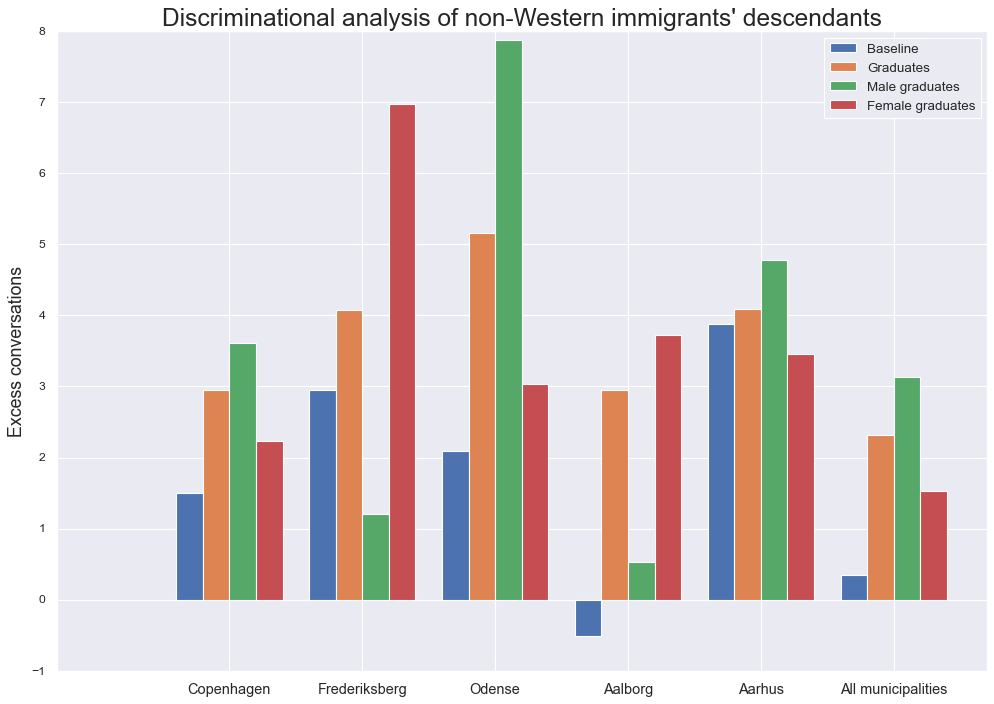

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))

width = 0.2 # the width of the bars
labels = ['Copenhagen', 'Frederiksberg', 'Odense', 'Aalborg', 'Aarhus', 'All municipalities']
x = np.arange(len(labels)) # the label locations

con = [1.5039, 2.9537, 2.0899, -0.5081, 3.8760, 0.3420] #Baseline
con2 = [2.9504, 4.0738, 5.1642, 2.9536, 4.0960, 2.3153] #Graduates
con3 = [3.6086, 1.2025, 7.8671, 0.5380, 4.7735, 3.1388] #Male graduates
con4 = [2.2387, 6.9674, 3.0350, 3.7229, 3.4573, 1.5254] #Female graduates

ax.bar(x, con, width, label="Baseline")
ax.bar(x + width, con2, width, label="Graduates")
ax.bar(x + 2 * width, con3, width, label="Male graduates")
ax.bar(x + 3 * width, con4, width, label="Female graduates")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Excess conversations", fontsize=16)
ax.set_title("Discriminational analysis of non-Western immigrants' descendants", fontsize=22)
ax.set_xticks(x+0.3)
ax.set_xticklabels(labels, fontsize=13)
#plt.grid(b=None)
ax.legend(bbox_to_anchor=(1.001,1), fontsize=12)

# Exploratory Data Analysis (EDA)

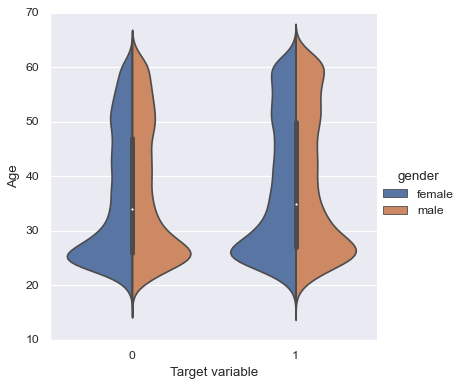

In [ ]:
ax = sns.catplot(data=df_eda_2, kind="violin", x="target", y="age", hue="gender", split=True)
ax.set(xlabel='Target variable', ylabel='Age')
plt.ylim(10, 70)
plt.show()

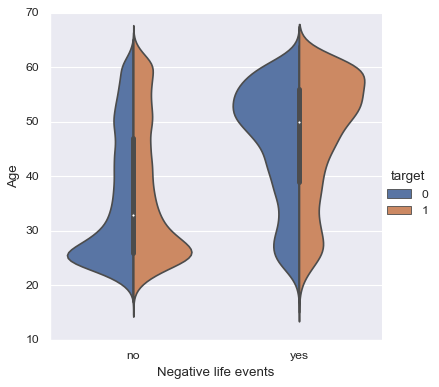

In [ ]:
ax = sns.catplot(data=df_eda_2, kind="violin", x="negative_life_events", y="age", hue="target", split=True)
ax.set(xlabel='Negative life events', ylabel='Age')
plt.ylim(10, 70)
plt.show()

In [ ]:
duration_upper = df_eda_2.aggregate_wage_missing_values.quantile(0.95)
duration_lower = df_eda_2.aggregate_wage_missing_values.quantile(0.1)

df_wage = df_eda_2[(df_eda_2.aggregate_wage_missing_values<=duration_upper) & (df_eda_2.aggregate_wage_missing_values>=duration_lower)]

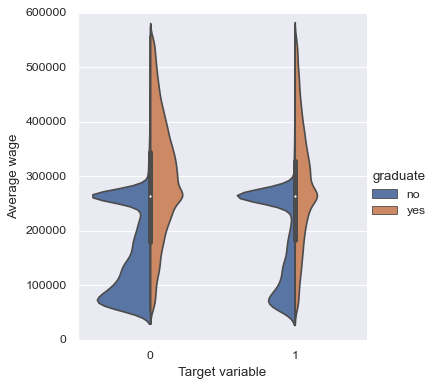

In [ ]:
ax = sns.catplot(data=df_wage, kind="violin", x="target", y="aggregate_wage_missing_values", hue="graduate", split=True)
ax.set(xlabel='Target variable', ylabel='Average wage')
plt.ylim(0, 600000)
plt.show()

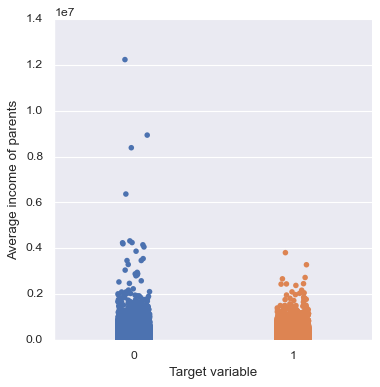

In [ ]:
ax = sns.catplot(data=df_eda_2, x="target", y="average_income_parents")
ax.set(xlabel='Target variable', ylabel='Average income of parents')
plt.ylim(0)
plt.show()

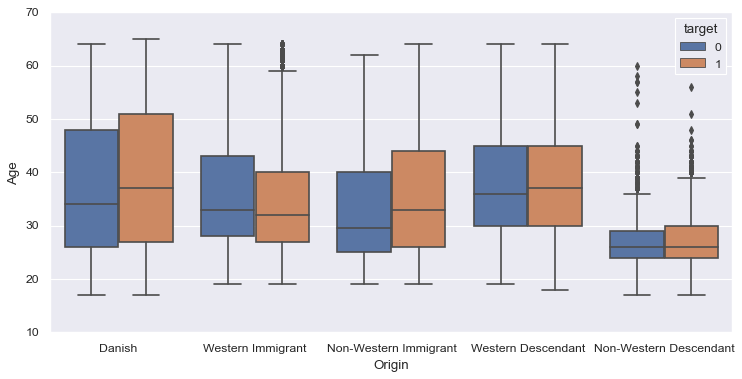

In [ ]:
labels = ['Danish', 'Western Immigrant', 'Non-Western Immigrant', 'Western Descendant', 'Non-Western Descendant']

plt.figure(figsize=(11,5))
ax = sns.boxplot(data=df_eda_1, x="origin", y="age", hue="target")
ax.set(xlabel='Origin', ylabel='Age')
ax.set_xticklabels(labels, fontsize=11)
plt.show()

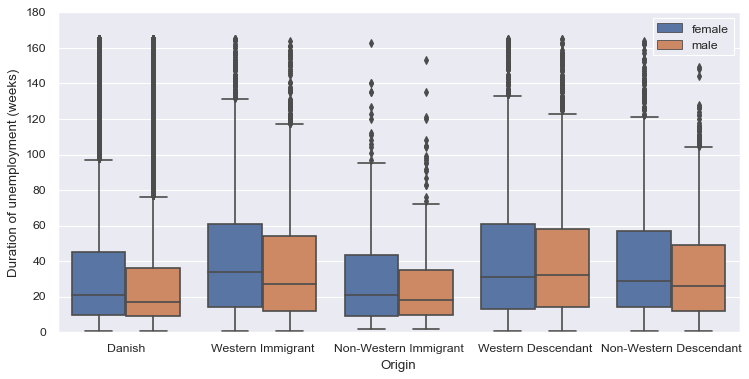

In [ ]:
labels = ['Danish', 'Western Immigrant', 'Non-Western Immigrant', 'Western Descendant', 'Non-Western Descendant']

plt.figure(figsize=(11,5))

ax = sns.boxplot(data=df_eda_1, x="origin", y="duration", hue="gender")
ax.set(xlabel='Origin', ylabel='Duration of unemployment (weeks)')
ax.set_xticklabels(labels, fontsize=11)

#Controlling the legend
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ["female", "male"])

plt.show()

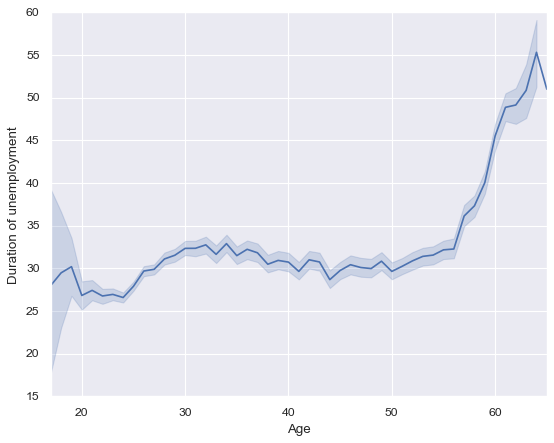

In [ ]:
ax = sns.lineplot(data=df_eda_1, x="age", y="duration")
ax.set(xlabel='Age', ylabel='Duration of unemployment')

plt.xlim(17, 65)
plt.show()

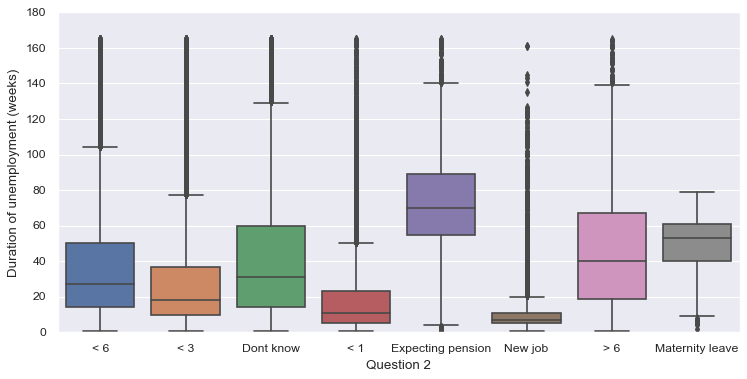

In [ ]:
labels = ["< 6", "< 3", "Dont know", "< 1", "Expecting pension", "New job", "> 6", "Maternity leave"]

plt.figure(figsize=(11,5))

ax = sns.boxplot(data=df_eda_1, x="q2", y="duration")
ax.set(xlabel='Question 2', ylabel='Duration of unemployment (weeks)')
ax.set_xticklabels(labels, fontsize=11)
plt.show()

# Feature selection & Analysis

Having finished my discriminational analysis, I now move on to my next analysis, consisting of feature selection and supervised machine learning analysis. 

I now stand with only four columns containing missing data (q4, q5, q6 & q7). Given that the amount of missing data is almost half the number of observations, any imputation would probably result in data leakage between the train and test set. To get around this problem, I choose to split my data frame at this stage and use an iterative imputer on the train and test set separately. 

Being aware that some models need feature scaling, while others, like tree models, can efficiently work without scaling, I choose to separate the data.

<img src="https://github.com/sg-tarek/Python/blob/main/flow.png?raw=1" width="480">

In [ ]:
#I start by splitting the data:
X = df.iloc[:,1:]
y = df.iloc[:,0]

column = X.columns

In [ ]:
#Given the size of the dataset I choose to only put 10% aside for the training set:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=random_seed_val)

### Iterative imputer algorithm

Besides simple imputation or deletion of rows/columns, I will also apply an iterative imputer algorithm to fill out the missing values. I have four columns left, with almost half the values missing (q4-q7). Given a large amount of missing data, it would be a waste to label them with the most frequent or delete them (which would be a significant loss of data). Instead, I will impute the data to fill missing values.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(imputation_order='ascending', max_iter=20, random_state=random_seed_val, n_nearest_features=None)

X_train = pd.DataFrame(imputer.fit_transform(X_train), columns = column)
X_test = pd.DataFrame(imputer.fit_transform(X_test), columns = column)

In [ ]:
#The results from the imputation give continous results, so I make sure to convert them by rounding them:
questions = ['q4', 'q5', 'q6', 'q7']

for q in questions:
    X_test[q] = np.round(X_test[q].values)
    X_train[q] = np.round(X_train[q].values)

### Feature selection

There are different methods for performing feature selection. I have depicted three ways below, and I choose to go on with the intrinsic method, a built-in mechanism in sklearn models. As a comparison I also try out a single wrapper method.

Given that different models values different features, I have chosen to create a dictionary and fill it with the intrinsic method's output depending on the model in focus.

<img src="https://github.com/sg-tarek/Python/blob/main/feature_selection.png?raw=1" width="480">

In [ ]:
features = {}

In [ ]:
#Function for creating a Feature Importance Dataframe (FID)
def fid(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

#Plotting a feature importance dataframe (horizontal barchart)
def fid_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', palette="rocket", saturation=.5) \
       .set_title(title, fontsize = 20)

## No Scaling

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# define and fit the model
rf = RandomForestClassifier(n_jobs=-1, random_state=random_seed_val)
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=5)

In [ ]:
#Create table
rf_imp = fid(X_train.columns, rf.feature_importances_)
rf_imp

feature  feature_importance
0                               q2            0.058496
1       unemployment_fund_duration            0.054703
2               employment_rate_36            0.054310
3    aggregate_wage_missing_values            0.051662
4                              age            0.046297
..                             ...                 ...
127                    rar_no_info            0.000048
128                            kty            0.000038
129                         kty_12            0.000033
130                         q10a_1            0.000030
131                       kth_12_a            0.000018

[132 rows x 2 columns]

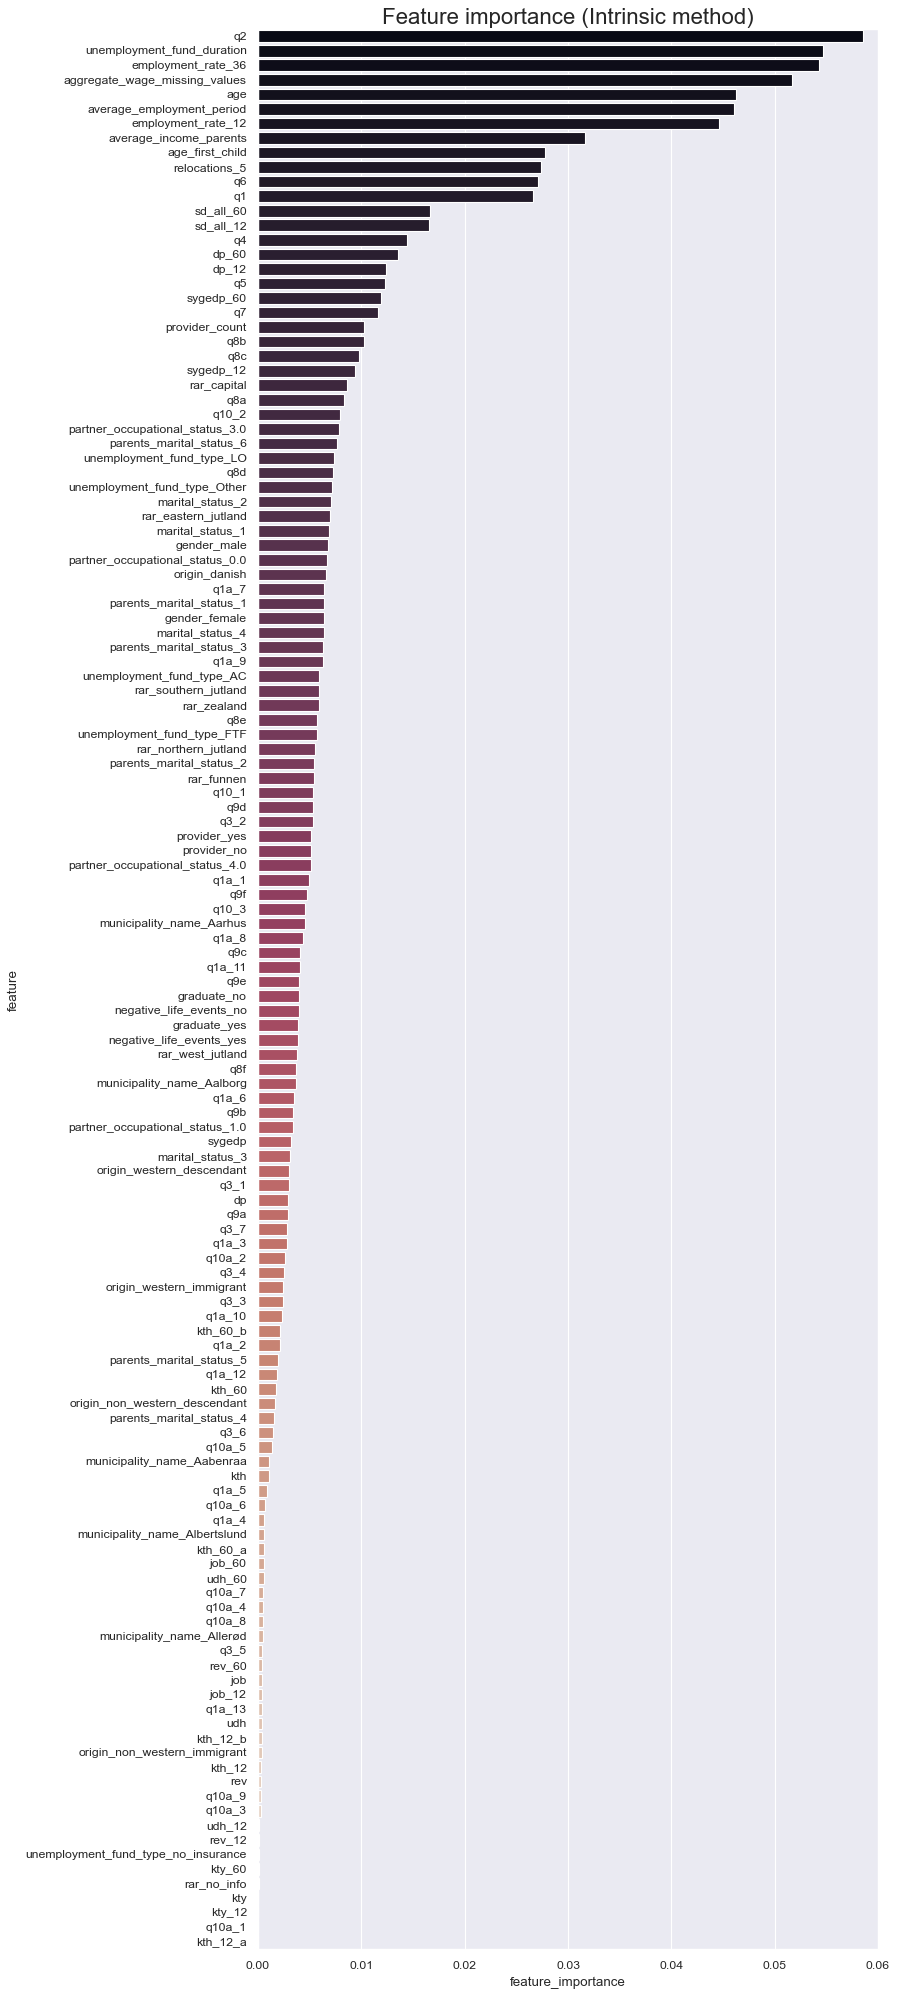

In [ ]:
fig, ax = plt.subplots(figsize=(10, 30))
fid_plot(rf_imp, 'Feature importance (Intrinsic method)')

In [ ]:
#Add most influencal features to dictionary
features['rf'] = rf_imp.iloc[:,0].values[:-11]

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# define and fit the model
dt = DecisionTreeClassifier(random_state=random_seed_val)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=5)

In [ ]:
#Create table
dt_imp = fid(X_train.columns, dt.feature_importances_)
dt_imp

feature  feature_importance
0                               q2            0.101762
1       unemployment_fund_duration            0.075771
2               employment_rate_36            0.073491
3    aggregate_wage_missing_values            0.066051
4        average_employment_period            0.052575
..                             ...                 ...
127                            kty            0.000025
128                    rar_no_info            0.000022
129                       kth_12_a            0.000019
130                         kty_12            0.000000
131                         udh_12            0.000000

[132 rows x 2 columns]

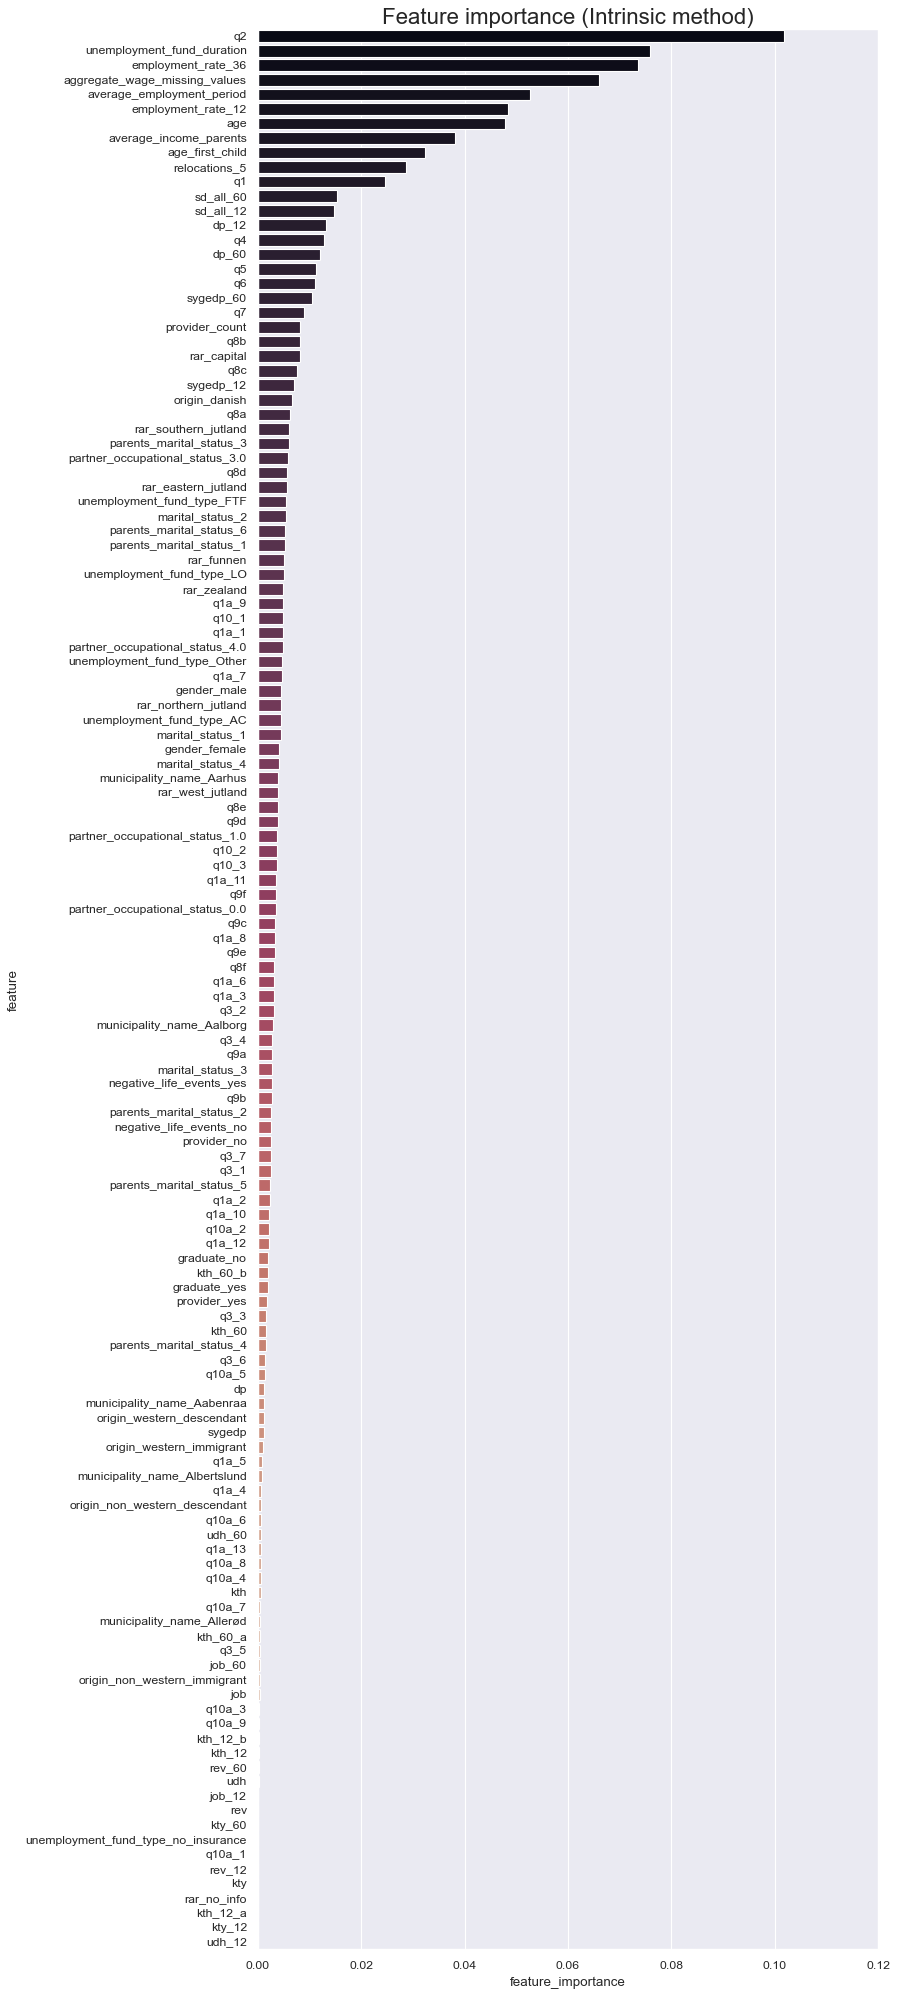

In [ ]:
fig, ax = plt.subplots(figsize=(10, 30))
fid_plot(dt_imp, 'Feature importance (Intrinsic method)')

In [ ]:
#Add most influencal features to dictionary
features['dt'] = dt_imp.iloc[:,0].values[:-17]

### Gradient boosted decision tree

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# define and fit the model
gbdt = GradientBoostingClassifier(random_state=random_seed_val)
gbdt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=5)

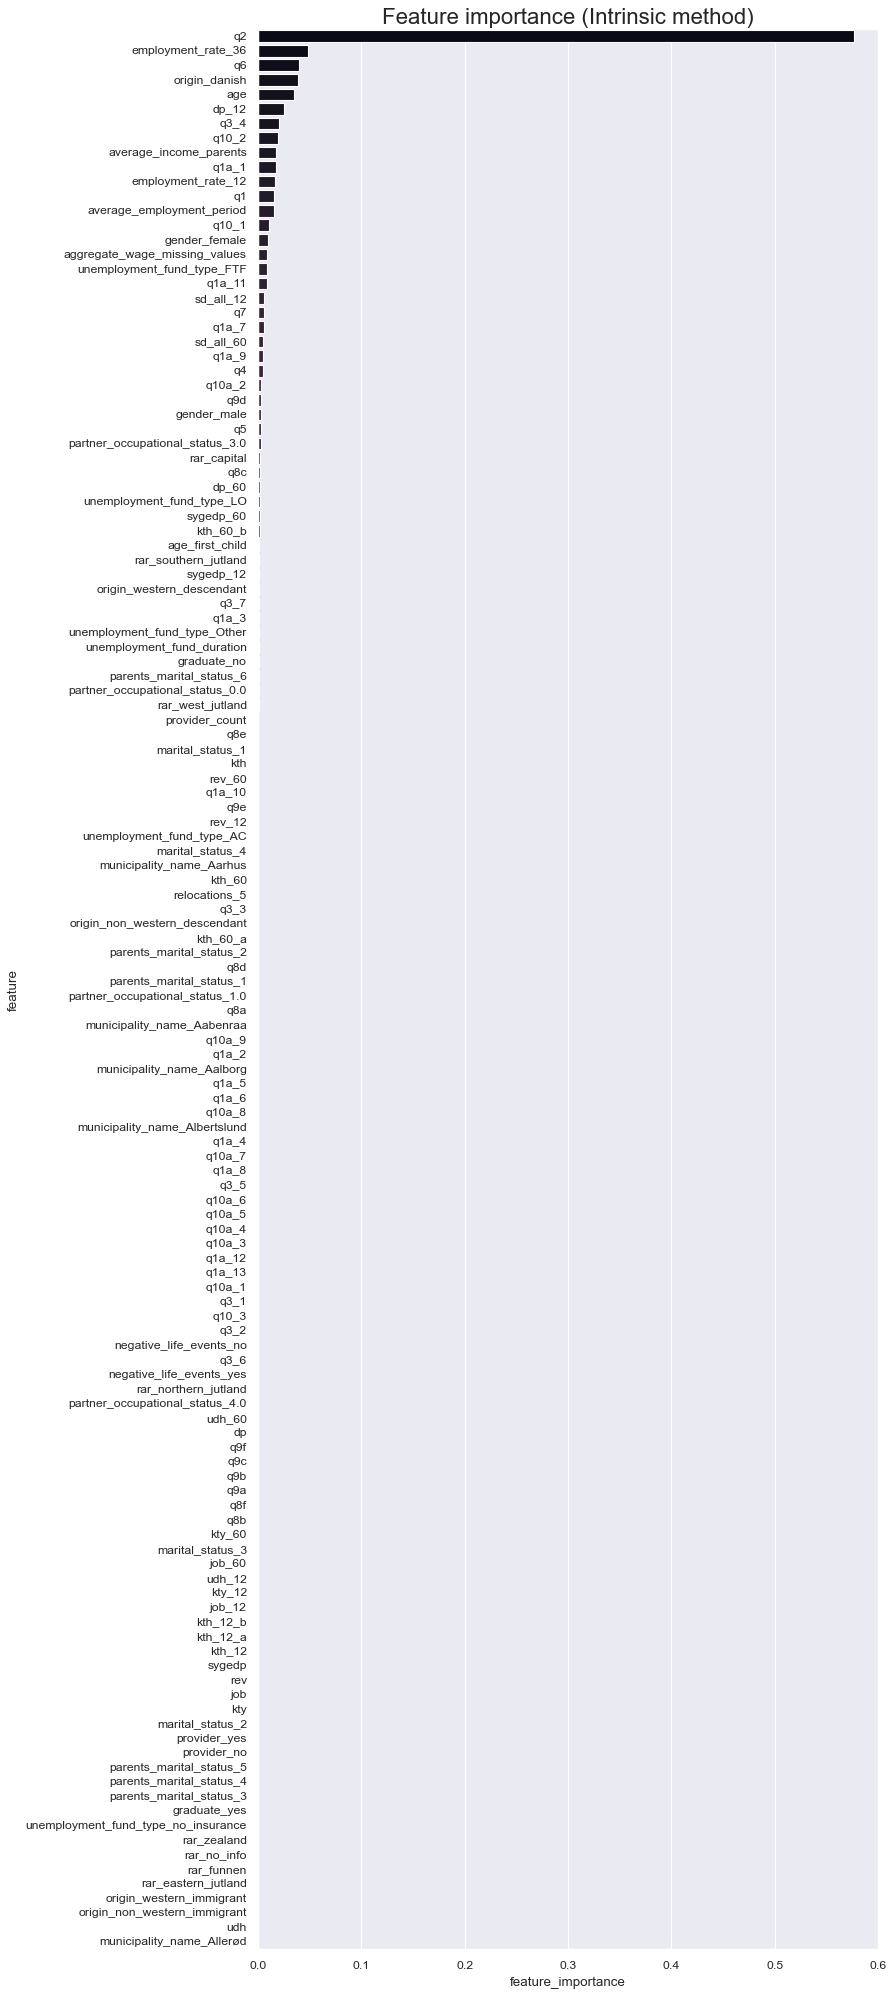

In [ ]:
#Create table
gbdt_imp = fid(X_train.columns, gbdt.feature_importances_)

#Create plot
fig, ax = plt.subplots(figsize=(10, 30))
fid_plot(gbdt_imp, 'Feature importance (Intrinsic method)')

In [ ]:
#Add most influencal features to dictionary
features['gbdt'] = gbdt_imp.iloc[:,0].values[:36]

## Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#I create a simple copy to make seperate scaled features
X_train_s = X_train.copy()
X_test_s = X_test.copy()

#I choose to keep the scale between 0 and 1 to put on the same range is by dummy columns
scaler = MinMaxScaler(feature_range=(0, 1))

#Columns which needs scaling
p = [
    'unemployment_fund_duration', 'age', 'aggregate_wage_missing_values',
    'provider_count', 'age_first_child', 'relocations_5', 'average_income_parents',
    'average_employment_period', 'q1', 'q2', 'q4', 'q5', 'q6', 'q7', 
    'sd_all_12', 'sd_all_60', 'dp_12', 'dp_60', 'kth_12', 'kth_12_a', 'kth_12_b', 'sygedp_12', 'rev_12',
    'job_12', 'kty_12', 'udh_12', 'kth_60', 'kth_60_a', 'kth_60_b', 'sygedp_60', 'rev_60', 
    'job_60', 'kty_60','udh_60'
] 

#Now we perform the scaling
X_train_s.loc[:,p] = scaler.fit_transform(X_train_s.loc[:,p])
X_test_s.loc[:,p] = scaler.fit_transform(X_test_s.loc[:,p])

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# define and fit the model
lr = LogisticRegression(penalty='l1', solver='liblinear', random_state=random_seed_val)
lr.fit(X_train_s, y_train)

LogisticRegression(penalty='l1', random_state=5, solver='liblinear')

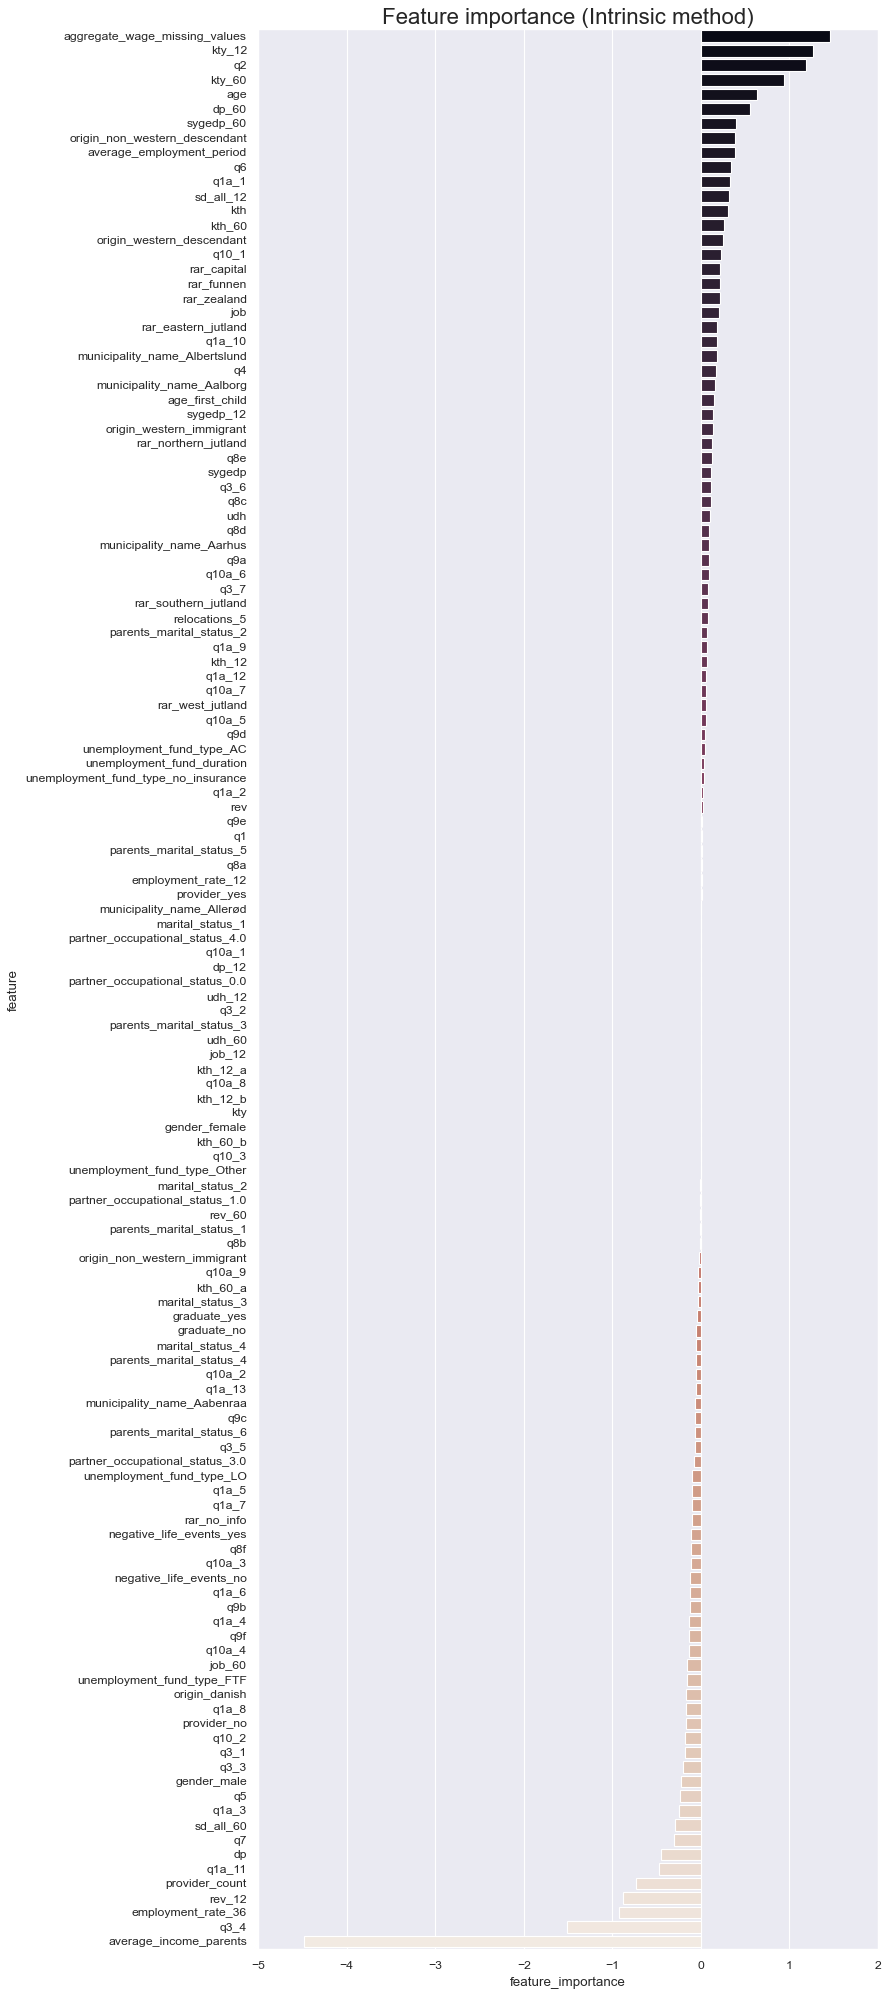

In [ ]:
#Create table
lr_imp = fid(X_train_s.columns, lr.coef_[0])

#Create plot
fig, ax = plt.subplots(figsize=(10, 30))
fid_plot(lr_imp, 'Feature importance (Intrinsic method)')

Coefficients are both positive and negative. The positive scores indicate a feature that predicts class 1, whereas the negative scores indicate a feature that predicts class 0.

In [ ]:
#Add most influencal features to dictionary
lr1 = lr_imp.iloc[:,0].values[:53]
lr2 = lr_imp.iloc[:,0].values[-47:]

features['lr'] = [*lr1, *lr2]

### Support Vector Machine

In [ ]:
from sklearn.linear_model import SGDClassifier

# define and fit the model
svm = SGDClassifier(penalty='l1', loss='hinge', random_state=random_seed_val, n_jobs=-1)
svm.fit(X_train_s, y_train)

SGDClassifier(n_jobs=-1, penalty='l1', random_state=5)

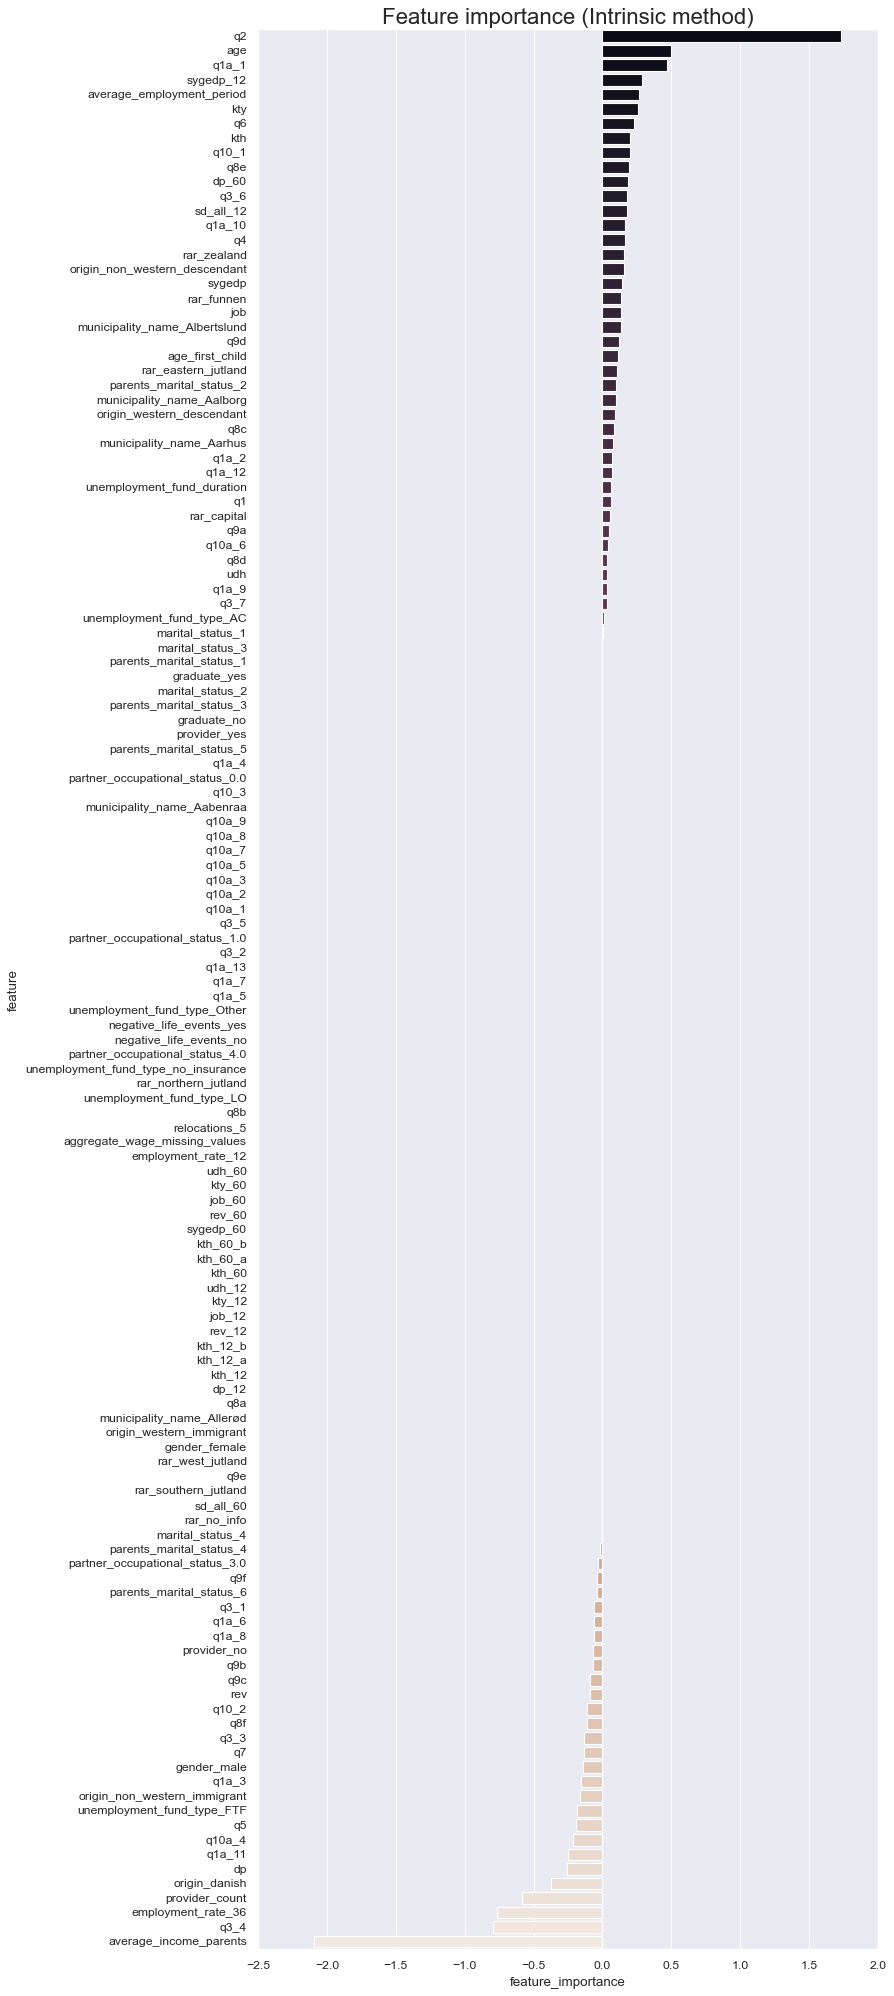

In [ ]:
#Create table
svm_imp = fid(X_train_s.columns, svm.coef_[0])

#Create plot
fig, ax = plt.subplots(figsize=(10, 30))
fid_plot(svm_imp, 'Feature importance (Intrinsic method)')

In [ ]:
#Add most influencal features to dictionary
svm1 = svm_imp.iloc[:,0].values[:40]
svm2 = svm_imp.iloc[:,0].values[-26:]

features['svm'] = [*svm1, *svm2]

### Wrapper method

**The Boruta Algorithm**

Besides an intrinsic method used above, we can also explore a wrapper method to see if it agrees with the above results:

Green area: confirmed features

Blue area: tentative features

In [ ]:
#!pip install Boruta -qq

from boruta import BorutaPy

# instantiate random forest
forest = RandomForestClassifier(n_jobs=-1, random_state=random_seed_val, max_depth = 5)

# fit boruta
boruta_selector = BorutaPy(forest, n_estimators = 'auto', random_state = random_seed_val)
boruta_selector.fit(np.array(X_train), np.array(y_train))

# store results
feature_names = X_train.columns
boruta_ranking = boruta_selector.ranking_
selected_features = np.array(feature_names)[boruta_ranking <= 2]

green_area = X.columns[boruta_selector.support_].to_list()
blue_area = X.columns[boruta_selector.support_weak_].to_list()

print('Green area:', green_area)
print('Blue area:', blue_area)

# Model comparison

Lets have an overview of the top ten most important features for each model:

In [ ]:
f = pd.DataFrame.from_dict(features, orient='index').T
f.head(10)

rf                             dt  \
0                             q2                             q2   
1     unemployment_fund_duration     unemployment_fund_duration   
2             employment_rate_36             employment_rate_36   
3  aggregate_wage_missing_values  aggregate_wage_missing_values   
4                            age      average_employment_period   
5      average_employment_period             employment_rate_12   
6             employment_rate_12                            age   
7         average_income_parents         average_income_parents   
8                age_first_child                age_first_child   
9                  relocations_5                  relocations_5   

                     gbdt                             lr  \
0                      q2  aggregate_wage_missing_values   
1      employment_rate_36                         kty_12   
2                      q6                             q2   
3           origin_danish                         kty_60   
4                     age                            age   
5                   dp_12                          dp_60   
6                    q3_4                      sygedp_60   
7                   q10_2  origin_non_western_descendant   
8  average_income_parents      average_employment_period   
9                   q1a_1                             q6   

                         svm  
0                         q2  
1                        age  
2                      q1a_1  
3                  sygedp_12  
4  average_employment_period  
5                        kty  
6                         q6  
7                        kth  
8                      q10_1  
9                        q8e

I create a bunch of dictionaries which will be used later on in my analysis!

In [ ]:
y_pred_train = {} #Used in accuracy_score
y_pred_test = {} #Used in accuracy_score

y_pred_prob_train = {} #Used in roc_curve
y_pred_prob_test = {} #Used in roc_curve

I now train all my models on the train and test data!

In [ ]:
#Random Forest
rf.fit(X_train.loc[:,features['rf']], y_train)
y_pred_train['rf'] = rf.predict(X_train.loc[:,features['rf']])
y_pred_test['rf'] = rf.predict(X_test.loc[:,features['rf']])
y_pred_prob_train['rf'] = rf.predict_proba(X_train.loc[:,features['rf']])[:, 1]
y_pred_prob_test['rf'] = rf.predict_proba(X_test.loc[:,features['rf']])[:, 1]

#Decision Tree
dt.fit(X_train.loc[:,features['dt']], y_train)
y_pred_train['dt'] = dt.predict(X_train.loc[:,features['dt']])
y_pred_test['dt'] = dt.predict(X_test.loc[:,features['dt']])
y_pred_prob_train['dt'] = dt.predict_proba(X_train.loc[:,features['dt']])[:, 1]
y_pred_prob_test['dt'] = dt.predict_proba(X_test.loc[:,features['dt']])[:, 1]

#Gradient Boosted Decision Tree
gbdt.fit(X_train.loc[:,features['gbdt']], y_train)
y_pred_train['gbdt'] = gbdt.predict(X_train.loc[:,features['gbdt']])
y_pred_test['gbdt'] = gbdt.predict(X_test.loc[:,features['gbdt']])
y_pred_prob_train['gbdt'] = gbdt.predict_proba(X_train.loc[:,features['gbdt']])[:, 1]
y_pred_prob_test['gbdt'] = gbdt.predict_proba(X_test.loc[:,features['gbdt']])[:, 1]

#Logistic Regression
lr.fit(X_train_s.loc[:,features['lr']], y_train)
y_pred_train['lr'] = lr.predict(X_train_s.loc[:,features['lr']])
y_pred_test['lr'] = lr.predict(X_test_s.loc[:,features['lr']])
y_pred_prob_train['lr'] = lr.predict_proba(X_train_s.loc[:,features['lr']])[:, 1]
y_pred_prob_test['lr'] = lr.predict_proba(X_test_s.loc[:,features['lr']])[:, 1]

#Support Vector Machine
svm.fit(X_train_s.loc[:,features['svm']], y_train)
y_pred_train['svm'] = svm.predict(X_train_s.loc[:,features['svm']])
y_pred_test['svm'] = svm.predict(X_test_s.loc[:,features['svm']])
y_pred_prob_train['svm'] = svm.decision_function(X_train_s.loc[:,features['svm']])
y_pred_prob_test['svm'] = svm.decision_function(X_test_s.loc[:,features['svm']])

In [ ]:
#Not defined models
from sklearn.neural_network import MLPClassifier

#Artificial neural networks 
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 100), #Two hidden layers with 100 neurons each
    activation="relu", #For the hidden layers
    solver='adam',
    batch_size=20,
    max_iter=20, #Number of epochs
    verbose=True, #Print progess
    early_stopping=True, #terminate training when validation score is not improving
    n_iter_no_change=2, #Maximum number of epochs to not meet tol improvement.
    validation_fraction=0.1, #default
    random_state=random_seed_val 
)

#MLPClassifier supports multi-class classification by applying Softmax as the output function.
#for binary classification it would be 'logistic'.
mlp.out_activation_ = 'logistic'
mlp.fit(X_train_s, y_train)

y_pred_train["mlp"] = mlp.predict(X_train_s)
y_pred_test["mlp"] = mlp.predict(X_test_s)
y_pred_prob_train["mlp"] = mlp.predict_proba(X_train_s)[:, 1]
y_pred_prob_test["mlp"] = mlp.predict_proba(X_test_s)[:, 1]

Iteration 1, loss = 0.61748450
Validation score: 0.651208
Iteration 2, loss = 0.60460509
Validation score: 0.661894
Iteration 3, loss = 0.59968817
Validation score: 0.658751
Iteration 4, loss = 0.59660657
Validation score: 0.661266
Iteration 5, loss = 0.59407734
Validation score: 0.661196
Validation score did not improve more than tol=0.000100 for 2 consecutive epochs. Stopping.


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

model_list = ['mlp','gbdt', 'rf', 'lr', 'svm', 'dt']

accuracy = {}
recall = {}
precision = {}
F1 = {}

for algo in model_list:
    accuracy[algo] = accuracy_score(y_test, y_pred_test[algo])
    recall[algo] = recall_score(y_test, y_pred_test[algo])
    precision[algo] = precision_score(y_test, y_pred_test[algo])
    F1[algo] = f1_score(y_test, y_pred_test[algo])

df_performance = pd.DataFrame([accuracy, recall, precision, F1])
df_performance.columns = model_list
df_performance.index = ["Accuracy", "Recall", "Precision", "F1"]
df_performance.style.highlight_max(axis=1)

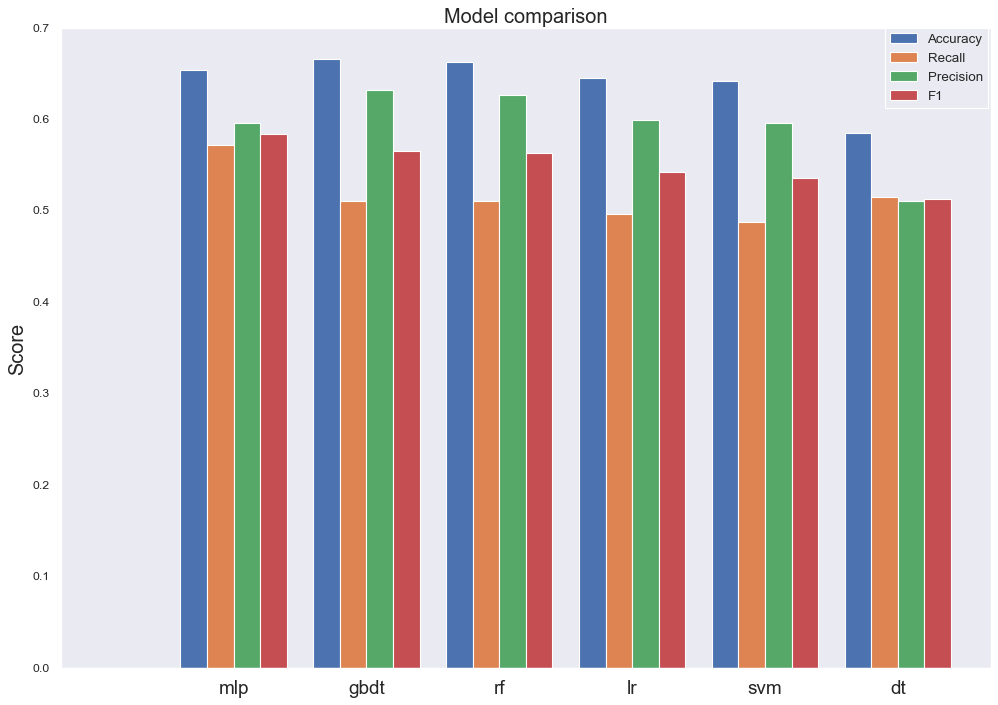

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))

width = 0.2 # the width of the bars
labels = df_performance.columns
x = np.arange(len(labels)) # the label locations

ax.bar(x, df_performance.iloc[0, :], width, label="Accuracy")
ax.bar(x + width, df_performance.iloc[1, :], width, label="Recall")
ax.bar(x + 2 * width, df_performance.iloc[2, :], width, label="Precision")
ax.bar(x + 3 * width, df_performance.iloc[3, :], width, label="F1")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Score", fontsize=18)
ax.set_title("Model comparison", fontsize=18)
ax.set_xticks(x+0.3)
ax.set_xticklabels(labels, fontsize=17)
plt.grid(b=None)
ax.legend(bbox_to_anchor=(1.004,1.01), fontsize=12)

### ROC curve

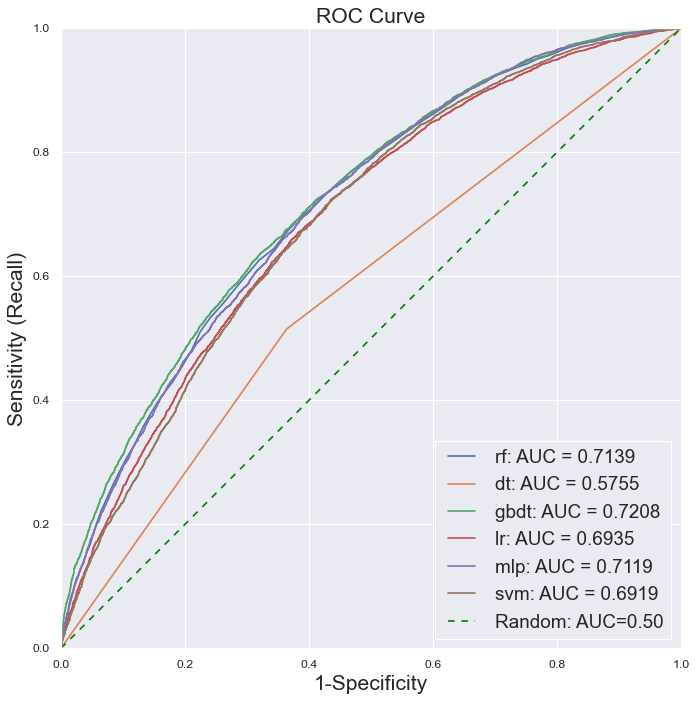

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr = {}
tpr = {}

m_list = ['rf', 'dt', 'gbdt', 'lr', 'mlp', 'svm']
for i in m_list:
    fpr[i], tpr[i], thresholds = roc_curve(y_test, y_pred_prob_test[i])

#Function which takes on FPR and TPR and plots the ROC curve
def plot_roc_curve_compare(fpr_dict, tpr_dict):
    for i in fpr.keys():
        plt.plot(
            fpr_dict[i],
            tpr_dict[i],
            label="%s: AUC = %0.4f" % (i, auc(fpr_dict[i], tpr_dict[i])))
    plt.plot([0, 1], [0, 1], color="Green", linestyle="--", label="Random: AUC=0.50")
    plt.xlabel("1-Specificity", fontsize=19)
    plt.ylabel("Sensitivity (Recall)", fontsize=19)
    plt.axis("square")
    plt.title("ROC Curve", fontsize=19)
    plt.legend(loc="lower right", fontsize=17)
    plt.show()

fig, ax = plt.subplots(figsize=(10, 30))
plot_roc_curve_compare(fpr, tpr)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test["gbdt"]))
print(classification_report(y_test, y_pred_test["rf"]))

              precision    recall  f1-score   support

           0       0.68      0.78      0.73      9150
           1       0.63      0.51      0.57      6759

    accuracy                           0.67     15909
   macro avg       0.66      0.65      0.65     15909
weighted avg       0.66      0.67      0.66     15909

              precision    recall  f1-score   support

           0       0.68      0.78      0.73      9150
           1       0.63      0.51      0.56      6759

    accuracy                           0.66     15909
   macro avg       0.65      0.64      0.64     15909
weighted avg       0.66      0.66      0.66     15909



### Confusion matrix

The basis for the above metrics is the confsion matrix, so I show one for the RF but it can easily be adapted to other models.

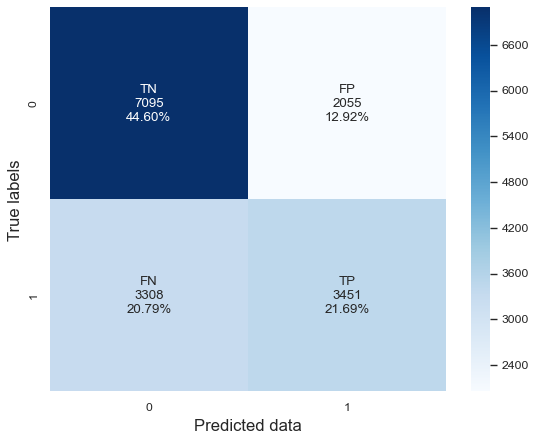

In [ ]:
from sklearn.metrics import confusion_matrix

#Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test["rf"])

#Lets look at it graphically:
group_names = ["TN", "FP", "FN", "TP"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = [
    "{0:.2%}".format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
fig, ax = plt.subplots()
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap="Blues")
labels = ['0', '1']
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_ylabel('True labels', fontsize=15)
ax.set_xlabel('Predicted data', fontsize=15)
plt.show()

# Hyperparameter tuning

When optimizing a tool it's worth condsidering which metric to optimize. The answer can differ depending on the use and the consequence of false positive vs. false negative.

I would value precision higher than recall when false positive is very costly while false negative is not so much.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
scorer = make_scorer(precision_score)

#### GBDT

The code below is commented out given the extreme long run-time!

gbdt = GradientBoostingClassifier(random_state=random_seed_val)

param_gbdt = {
    'learning_rate': [1, 0.5, 0.1, 0.01],
    'n_estimators':[1000, 1100, 1200],
    'max_depth': [3, 5],
    'subsample': [0.8, 1],
    'min_samples_split': [1, 2, 3, 4],
    'max_features': [0, 4, 8]
}

grid_obj = GridSearchCV(gbdt, 
                        param_grid=param_gbdt, 
                        scoring=scorer,
                        n_jobs=-1)

grid_fit = grid_obj.fit(X_train.loc[:,features['gbdt']], y_train)

grid_fit.best_params_

In [ ]:
gbdt_best = GradientBoostingClassifier(
    max_depth=5, 
    n_estimators=1000, 
    min_samples_split=2,
    max_features=4,
    subsample=0.8,
    learning_rate=0.1,
    random_state=random_seed_val)

gbdt_best.fit(X_train.loc[:,features['gbdt']], y_train)

y_pred_train['gbdt_best'] = gbdt_best.predict(X_train.loc[:,features['gbdt']])
y_pred_test['gbdt_best'] = gbdt_best.predict(X_test.loc[:,features['gbdt']])
y_pred_prob_train['gbdt_best'] = gbdt_best.predict_proba(X_train.loc[:,features['gbdt']])[:, 1]
y_pred_prob_test['gbdt_best'] = gbdt_best.predict_proba(X_test.loc[:,features['gbdt']])[:, 1]

#### RF

The code below is commented out given the extreme long run-time!

rf = RandomForestClassifier(n_jobs=-1, random_state=random_seed_val)

param_rf = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [1000, 1200, 1300, 1400]
}

rf_obj = GridSearchCV(rf, 
                      param_grid=param_rf, 
                      scoring=scorer,
                      n_jobs=-1)

rf_fit = rf_obj.fit(X_train.loc[:,features['rf']], y_train)

rf_fit.best_params_

In [ ]:
rf_best = RandomForestClassifier(
    n_jobs=-1,     
    bootstrap=False,
    max_depth=None,
    max_features='auto',
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=1200,
    random_state=random_seed_val)

rf_best.fit(X_train.loc[:,features['rf']], y_train)

y_pred_train['rf_best'] = rf_best.predict(X_train.loc[:,features['rf']])
y_pred_test['rf_best'] = rf_best.predict(X_test.loc[:,features['rf']])
y_pred_prob_train['rf_best'] = rf_best.predict_proba(X_train.loc[:,features['rf']])[:, 1]
y_pred_prob_test['rf_best'] = rf_best.predict_proba(X_test.loc[:,features['rf']])[:, 1]
model_list.append('rf_best')

### Precision-Recall Curve

I use a PR-curve to adjust the threshold from 50% to 60%.

Text(0, 0.5, 'Precision')

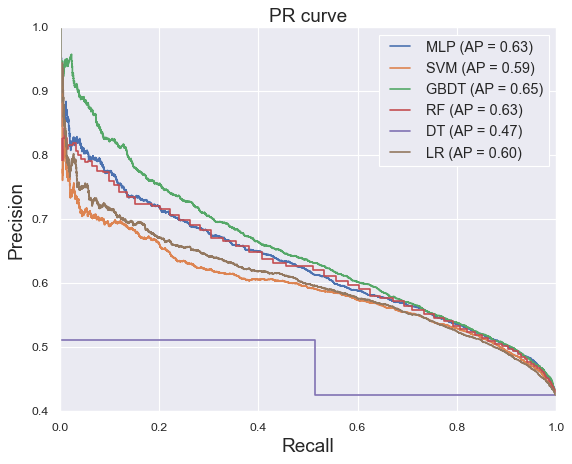

In [ ]:
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(mlp, X_test_s, y_test, name = 'MLP', ax = plt.gca())
plot_precision_recall_curve(svm, X_test_s.loc[:,features['svm']], y_test, name = 'SVM', ax = plt.gca())
plot_precision_recall_curve(gbdt, X_test.loc[:,features['gbdt']], y_test, name = 'GBDT', ax = plt.gca())
plot_precision_recall_curve(rf, X_test.loc[:,features['rf']], y_test, name = 'RF', ax = plt.gca())
plot_precision_recall_curve(dt, X_test.loc[:,features['dt']], y_test, name = 'DT', ax = plt.gca())
plot_precision_recall_curve(lr, X_test_s.loc[:,features['lr']], y_test, name = 'LR', ax = plt.gca())

plt.title('PR curve', fontsize=17)
plt.legend( loc = 'upper right', fontsize=13)
plt.xlabel('Recall', fontsize=17)
plt.ylabel('Precision', fontsize=17)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_recall_curve

y_scores = y_pred_prob_test['rf_best']

p, r, thresholds = precision_recall_curve(y_test, y_scores)

In [ ]:
def adjusted_classes(y_scores, t):
    """
    The idea is to adjust class predictions based on a new threshold (t).
    It will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, thresholds, t=0.5):
    """
    We use the pair of precision (p) and recall (r) values created above
    to plot the precision-recall-curve and show the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    
    # plot the curve
    plt.figure(figsize=(8,8))
    plt.title("Precision and Recall curve ^ = current threshold")
    plt.step(r, p, color='b', alpha=0.2, where='post')
    plt.fill_between(r, p, step='post', alpha=0.2, color='b')
    plt.ylim([0.60, 1]);
    plt.xlim([0, 1]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(r[close_default_clf], p[close_default_clf], '|', c='k', markersize=15)

     pred_neg  pred_pos
neg      8327       823
pos      4830      1929


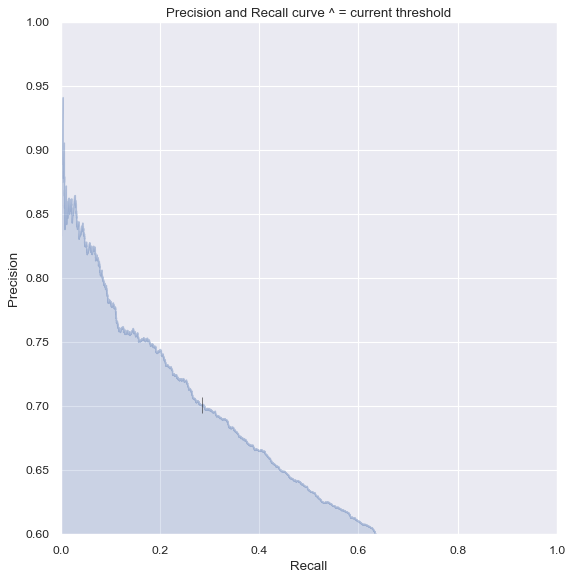

In [ ]:
#Adjusting the threshold
precision_recall_threshold(p, r, thresholds, 0.60)

In [ ]:
y_scores = y_pred_prob_test['gbdt_best']
y_pred_test['gbdt_best_adj'] = adjusted_classes(y_scores, 0.60)

y_scores = y_pred_prob_test['rf_best']
y_pred_test['rf_best_adj'] = adjusted_classes(y_scores, 0.60)

#### Performance

In [ ]:
model_list = ['rf_best_adj', 'gbdt_best_adj', 'gbdt_best', 'rf_best', 'gbdt', 'rf']

accuracy = {}
recall = {}
precision = {}
F1 = {}

for algo in model_list:
    accuracy[algo] = accuracy_score(y_test, y_pred_test[algo])
    recall[algo] = recall_score(y_test, y_pred_test[algo])
    precision[algo] = precision_score(y_test, y_pred_test[algo])
    F1[algo] = f1_score(y_test, y_pred_test[algo])

df_performance = pd.DataFrame([accuracy, recall, precision, F1])
df_performance.columns = model_list
df_performance.index = ["Accuracy", "Recall", "Precision", "F1"]
df_performance.style.highlight_max(axis=1)

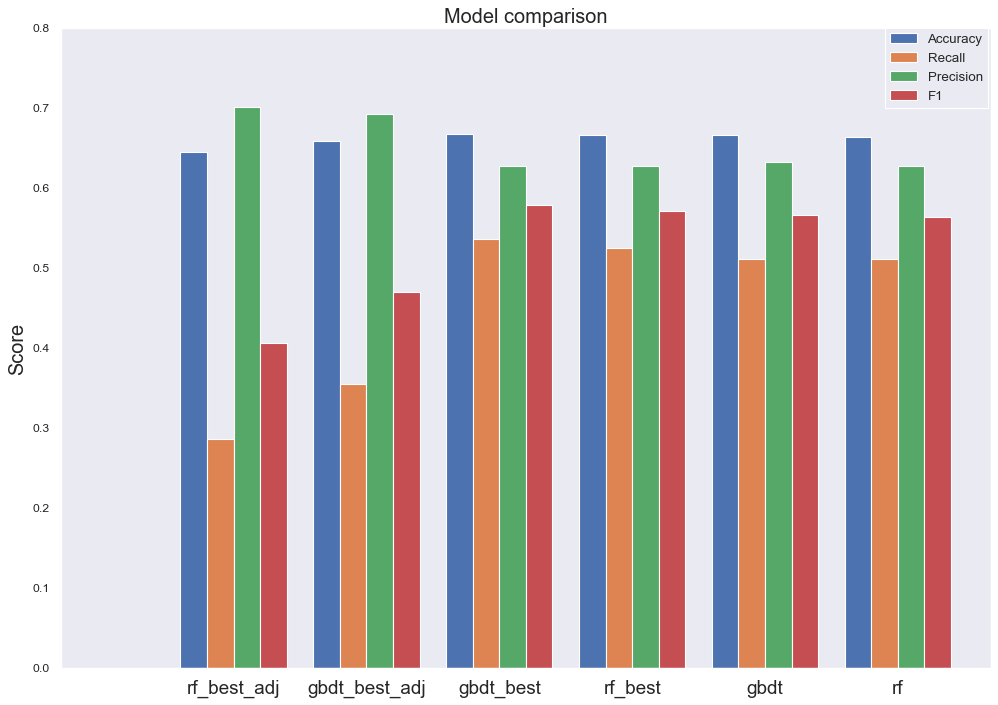

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))

width = 0.2 # the width of the bars
labels = df_performance.columns
x = np.arange(len(labels)) # the label locations

ax.bar(x, df_performance.iloc[0, :], width, label="Accuracy")
ax.bar(x + width, df_performance.iloc[1, :], width, label="Recall")
ax.bar(x + 2 * width, df_performance.iloc[2, :], width, label="Precision")
ax.bar(x + 3 * width, df_performance.iloc[3, :], width, label="F1")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Score", fontsize=18)
ax.set_title("Model comparison", fontsize=18)
ax.set_xticks(x+0.3)
ax.set_xticklabels(labels, fontsize=17)
plt.grid(b=None)
ax.legend(bbox_to_anchor=(1.004,1.01), fontsize=12)

# Model interpretability

I use Lime to understand the logic behind my RF model. The technique approaches the model as a black-box and tries to change feature values to understand the change in classification.

In [ ]:
#!pip install lime -qq

import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(training_data = X_train.loc[:,features['rf']].values,
                                                   mode = 'classification',
                                                   feature_names = X_train.loc[:,features['rf']].columns,
                                                   categorical_names = ['0', '1'],
                                                   feature_selection = 'auto'
)
                                                   
exp1 = explainer.explain_instance(
    data_row=X_test.loc[:,features['rf']].iloc[1], 
    predict_fn=rf_best.predict_proba
)

exp1.show_in_notebook(show_table=True)


exp2 = explainer.explain_instance(
    data_row=X_test.loc[:,features['rf']].iloc[8], 
    predict_fn=rf_best.predict_proba
)

exp2.show_in_notebook(show_table=True)

#Motivation: 
#https://towardsdatascience.com/lime-how-to-interpret-machine-learning-models-with-python-94b0e7e4432e
#https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e

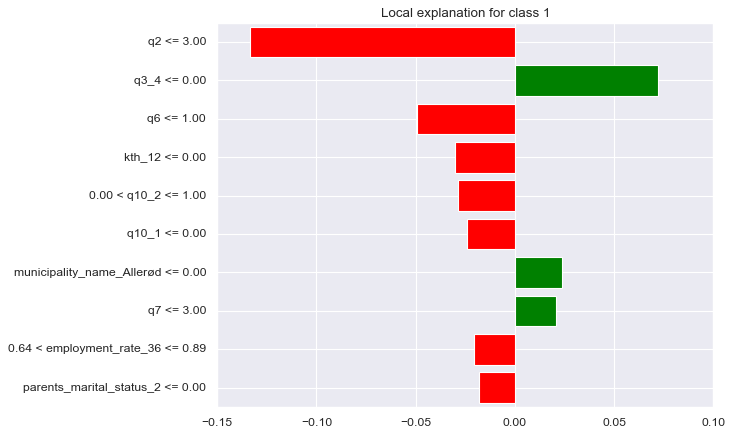

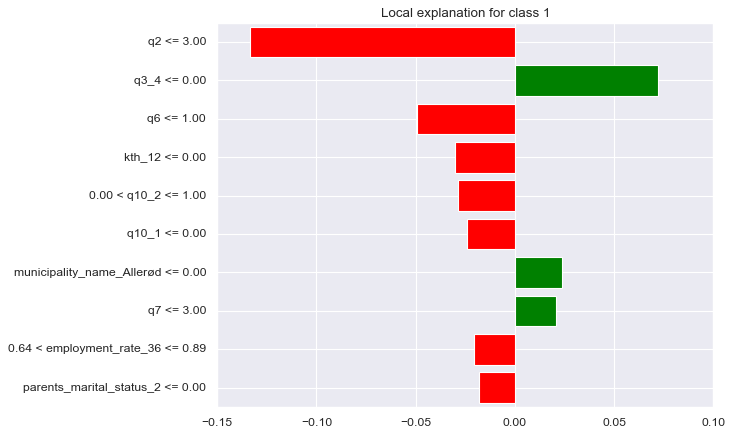

In [ ]:
exp1.as_pyplot_figure()

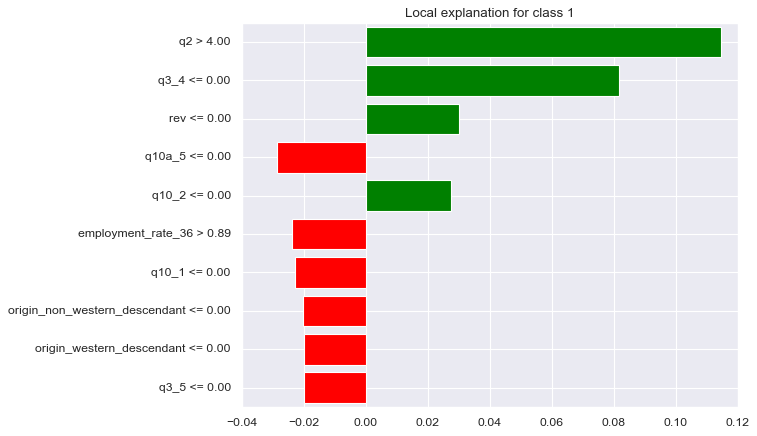

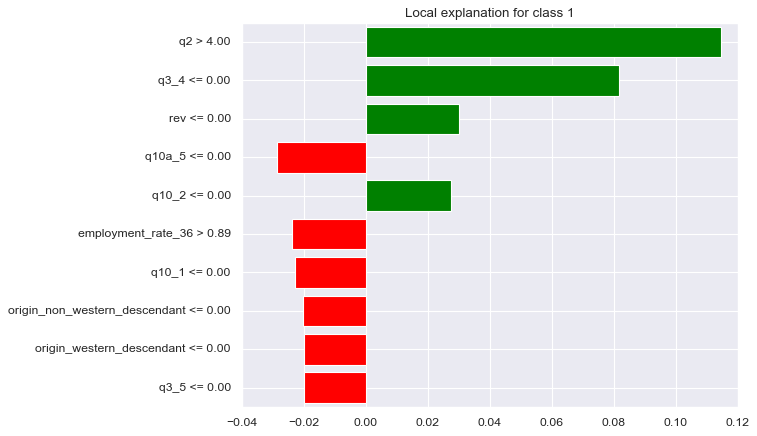

In [ ]:
exp2.as_pyplot_figure()

# Discriminational adjustment

My discrimination adjust consist of removing potential discriminatory feature, such as origin, age and gender. I do this for both GBDT and RF.

### GBDT

In [ ]:
no_origin = features['gbdt']
no_origin = no_origin[no_origin != 'origin_danish']

no_age = features['gbdt']
no_age = no_age[no_age != 'age']

no_gender = features['gbdt']
no_gender = no_gender[no_gender != 'gender_female']
no_gender = no_gender[no_gender != 'gender_male']

no_age_origin_gender = features['gbdt']
no_age_origin_gender = no_age_origin_gender[no_age_origin_gender != 'age']
no_age_origin_gender = no_age_origin_gender[no_age_origin_gender != 'origin_danish']
no_age_origin_gender = no_age_origin_gender[no_age_origin_gender != 'gender_female']
no_age_origin_gender = no_age_origin_gender[no_age_origin_gender != 'gender_male']

In [ ]:
#Remove Origin
gbdt_origin = GradientBoostingClassifier(max_depth=5, n_estimators=1000, min_samples_split=2, max_features=4, subsample=0.8, learning_rate=0.1, random_state=random_seed_val)
gbdt_origin.fit(X_train.loc[:,no_origin], y_train)

y_pred_test['gbdt_origin'] = gbdt_origin.predict(X_test.loc[:,no_origin])
y_pred_prob_test['gbdt_origin'] = gbdt_origin.predict_proba(X_test.loc[:,no_origin])[:, 1]

#Remove Age
gbdt_age = GradientBoostingClassifier(max_depth=5, n_estimators=1000, min_samples_split=2, max_features=4, subsample=0.8, learning_rate=0.1, random_state=random_seed_val)
gbdt_age.fit(X_train.loc[:,no_age], y_train)

y_pred_test['gbdt_age'] = gbdt_age.predict(X_test.loc[:,no_age])
y_pred_prob_test['gbdt_age'] = gbdt_age.predict_proba(X_test.loc[:,no_age])[:, 1]

#Remove gender
gbdt_gender = GradientBoostingClassifier(max_depth=5, n_estimators=1000, min_samples_split=2, max_features=4, subsample=0.8, learning_rate=0.1, random_state=random_seed_val)
gbdt_gender.fit(X_train.loc[:,no_gender], y_train)

y_pred_test['gbdt_gender'] = gbdt_gender.predict(X_test.loc[:,no_gender])
y_pred_prob_test['gbdt_gender'] = gbdt_gender.predict_proba(X_test.loc[:,no_gender])[:, 1]

#Remove Age, origin & gender
gbdt_all = GradientBoostingClassifier(max_depth=5, n_estimators=1000, min_samples_split=2, max_features=4, subsample=0.8, learning_rate=0.1, random_state=random_seed_val)
gbdt_all.fit(X_train.loc[:,no_age_origin_gender], y_train)

y_pred_test['gbdt_all'] = gbdt_all.predict(X_test.loc[:,no_age_origin_gender])
y_pred_prob_test['gbdt_all'] = gbdt_all.predict_proba(X_test.loc[:,no_age_origin_gender])[:, 1]

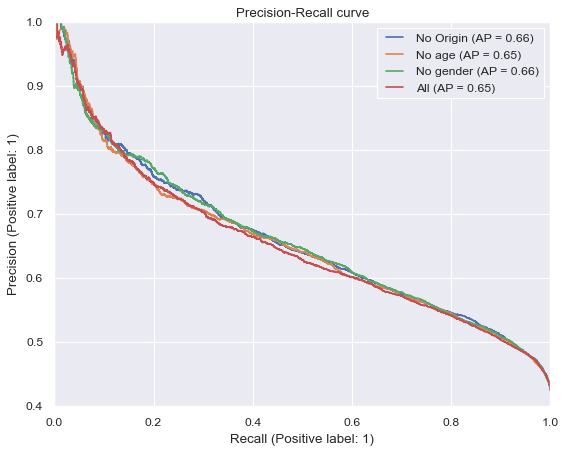

In [ ]:
plot_precision_recall_curve(gbdt_origin, X_test.loc[:,no_origin], y_test, name = 'No Origin', ax = plt.gca())
plot_precision_recall_curve(gbdt_age, X_test.loc[:,no_age], y_test, name = 'No age', ax = plt.gca())
plot_precision_recall_curve(gbdt_gender, X_test.loc[:,no_gender], y_test, name = 'No gender', ax = plt.gca())
plot_precision_recall_curve(gbdt_all, X_test.loc[:,no_age_origin_gender], y_test, name = 'All', ax = plt.gca())

plt.title('Precision-Recall curve')
plt.legend( loc = 'upper right')

In [ ]:
y_scores = y_pred_prob_test['gbdt_origin']
y_pred_test['gbdt_origin_adj'] = adjusted_classes(y_scores, 0.60)

y_scores = y_pred_prob_test['gbdt_age']
y_pred_test['gbdt_age_adj'] = adjusted_classes(y_scores, 0.60)

y_scores = y_pred_prob_test['gbdt_gender']
y_pred_test['gbdt_gender_adj'] = adjusted_classes(y_scores, 0.60)

y_scores = y_pred_prob_test['gbdt_all']
y_pred_test['gbdt_all_adj'] = adjusted_classes(y_scores, 0.60)

In [ ]:
model_list = ['gbdt_best_adj', 'gbdt_origin_adj', 'gbdt_age_adj', 'gbdt_gender_adj', 'gbdt_all_adj']

accuracy_2 = {}
recall_2 = {}
precision_2 = {}
F1_2 = {}

for algo in model_list:
    accuracy_2[algo] = accuracy_score(y_test, y_pred_test[algo])
    recall_2[algo] = recall_score(y_test, y_pred_test[algo])
    precision_2[algo] = precision_score(y_test, y_pred_test[algo])
    F1_2[algo] = f1_score(y_test, y_pred_test[algo])

df_discrimnatory = pd.DataFrame([accuracy_2, recall_2, precision_2, F1_2])
df_discrimnatory.columns = model_list
df_discrimnatory.index = ["Accuracy", "Recall", "Precision", "F1"]
df_discrimnatory.style.highlight_max(axis=1)

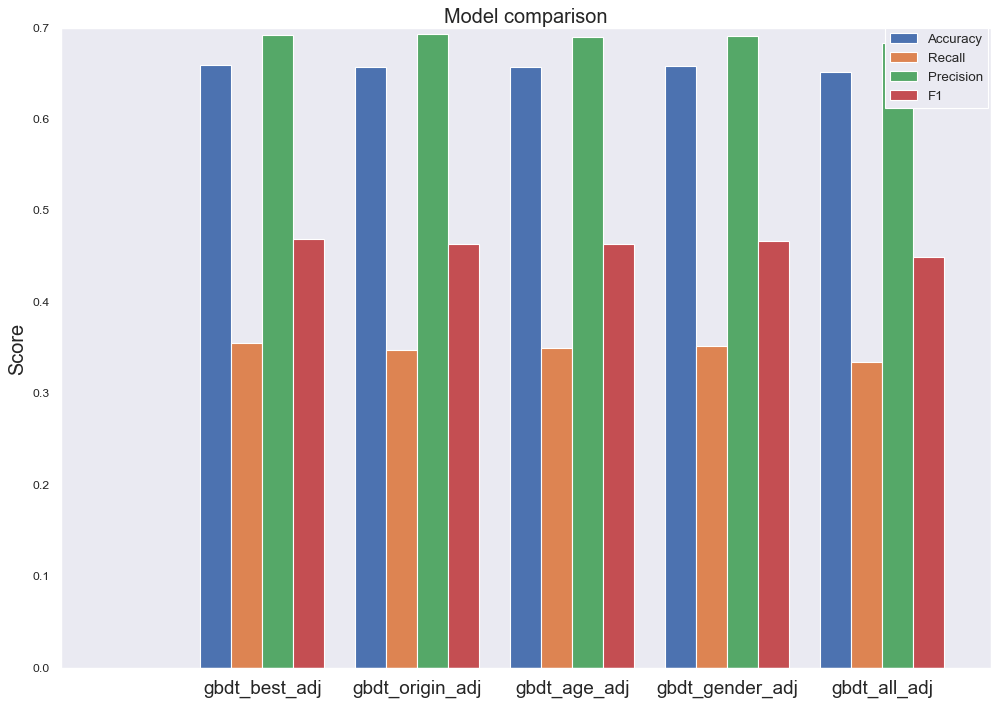

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))

width = 0.2 # the width of the bars
labels = df_discrimnatory.columns
x = np.arange(len(labels)) # the label locations

ax.bar(x, df_discrimnatory.iloc[0, :], width, label="Accuracy")
ax.bar(x + width, df_discrimnatory.iloc[1, :], width, label="Recall")
ax.bar(x + 2 * width, df_discrimnatory.iloc[2, :], width, label="Precision")
ax.bar(x + 3 * width, df_discrimnatory.iloc[3, :], width, label="F1")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Score", fontsize=18)
ax.set_title("Model comparison", fontsize=18)
ax.set_xticks(x+0.3)
ax.set_xticklabels(labels, fontsize=17)
plt.grid(b=None)
ax.legend(bbox_to_anchor=(1.004,1.01), fontsize=12)

### RF

In [ ]:
features['rf']

array(['q2', 'unemployment_fund_duration', 'employment_rate_36',
       'aggregate_wage_missing_values', 'age',
       'average_employment_period', 'employment_rate_12',
       'average_income_parents', 'age_first_child', 'relocations_5', 'q6',
       'q1', 'sd_all_60', 'sd_all_12', 'q4', 'dp_60', 'dp_12', 'q5',
       'sygedp_60', 'q7', 'provider_count', 'q8b', 'q8c', 'sygedp_12',
       'rar_capital', 'q8a', 'q10_2', 'partner_occupational_status_3.0',
       'parents_marital_status_6', 'unemployment_fund_type_LO', 'q8d',
       'unemployment_fund_type_Other', 'marital_status_2',
       'rar_eastern_jutland', 'marital_status_1', 'gender_male',
       'partner_occupational_status_0.0', 'origin_danish', 'q1a_7',
       'parents_marital_status_1', 'gender_female', 'marital_status_4',
       'parents_marital_status_3', 'q1a_9', 'unemployment_fund_type_AC',
       'rar_southern_jutland', 'rar_zealand', 'q8e',
       'unemployment_fund_type_FTF', 'rar_northern_jutland',
       'parents_mari

In [ ]:
no_origin = features['rf']
no_origin = no_origin[no_origin != 'origin_danish']
no_origin = no_origin[no_origin != 'origin_western_immigrant']
no_origin = no_origin[no_origin != 'origin_non_western_immigrant']
no_origin = no_origin[no_origin != 'origin_western_descendant']
no_origin = no_origin[no_origin != 'origin_non_western_descendant']

no_age = features['rf']
no_age = no_age[no_age != 'age']

no_gender = features['rf']
no_gender = no_gender[no_gender != 'gender_female']
no_gender = no_gender[no_gender != 'gender_male']

no_age_origin_gender = features['rf']
no_age_origin_gender = no_age_origin_gender[no_age_origin_gender != 'age']
no_age_origin_gender = no_age_origin_gender[no_age_origin_gender != 'origin_danish']
no_age_origin_gender = no_age_origin_gender[no_age_origin_gender != 'origin_western_immigrant']
no_age_origin_gender = no_age_origin_gender[no_age_origin_gender != 'origin_non_western_immigrant']
no_age_origin_gender = no_age_origin_gender[no_age_origin_gender != 'origin_western_descendant']
no_age_origin_gender = no_age_origin_gender[no_age_origin_gender != 'origin_non_western_descendant']
no_age_origin_gender = no_age_origin_gender[no_age_origin_gender != 'gender_female']
no_age_origin_gender = no_age_origin_gender[no_age_origin_gender != 'gender_male']

In [ ]:
#Remove Origin
rf_origin = RandomForestClassifier(n_jobs=-1, bootstrap=False, max_depth=None, max_features='auto', min_samples_leaf=2, min_samples_split=2, n_estimators=1200, random_state=random_seed_val)
rf_origin.fit(X_train.loc[:,no_origin], y_train)

y_pred_test['rf_origin'] = rf_origin.predict(X_test.loc[:,no_origin])
y_pred_prob_test['rf_origin'] = rf_origin.predict_proba(X_test.loc[:,no_origin])[:, 1]

#Remove Age
rf_age = RandomForestClassifier(n_jobs=-1, bootstrap=False, max_depth=None, max_features='auto', min_samples_leaf=2, min_samples_split=2, n_estimators=1200, random_state=random_seed_val)
rf_age.fit(X_train.loc[:,no_age], y_train)

y_pred_test['rf_age'] = rf_age.predict(X_test.loc[:,no_age])
y_pred_prob_test['rf_age'] = rf_age.predict_proba(X_test.loc[:,no_age])[:, 1]

#Remove gender
rf_gender = RandomForestClassifier(n_jobs=-1, bootstrap=False, max_depth=None, max_features='auto', min_samples_leaf=2, min_samples_split=2, n_estimators=1200, random_state=random_seed_val)
rf_gender.fit(X_train.loc[:,no_gender], y_train)

y_pred_test['rf_gender'] = rf_gender.predict(X_test.loc[:,no_gender])
y_pred_prob_test['rf_gender'] = rf_gender.predict_proba(X_test.loc[:,no_gender])[:, 1]

#Remove Age, origin & gender
rf_all = RandomForestClassifier(n_jobs=-1, bootstrap=False, max_depth=None, max_features='auto', min_samples_leaf=2, min_samples_split=2, n_estimators=1200, random_state=random_seed_val)
rf_all.fit(X_train.loc[:,no_age_origin_gender], y_train)

y_pred_test['rf_all'] = rf_all.predict(X_test.loc[:,no_age_origin_gender])
y_pred_prob_test['rf_all'] = rf_all.predict_proba(X_test.loc[:,no_age_origin_gender])[:, 1]

In [ ]:
y_scores = y_pred_prob_test['rf_origin']
y_pred_test['rf_origin_adj'] = adjusted_classes(y_scores, 0.60)

y_scores = y_pred_prob_test['rf_age']
y_pred_test['rf_age_adj'] = adjusted_classes(y_scores, 0.60)

y_scores = y_pred_prob_test['rf_gender']
y_pred_test['rf_gender_adj'] = adjusted_classes(y_scores, 0.60)

y_scores = y_pred_prob_test['rf_all']
y_pred_test['rf_all_adj'] = adjusted_classes(y_scores, 0.60)

In [ ]:
model_list = ['rf_best_adj', 'rf_origin_adj', 'rf_age_adj', 'rf_gender_adj', 'rf_all_adj']

accuracy_2 = {}
recall_2 = {}
precision_2 = {}
F1_2 = {}

for algo in model_list:
    accuracy_2[algo] = accuracy_score(y_test, y_pred_test[algo])
    recall_2[algo] = recall_score(y_test, y_pred_test[algo])
    precision_2[algo] = precision_score(y_test, y_pred_test[algo])
    F1_2[algo] = f1_score(y_test, y_pred_test[algo])

df_discrimnatory = pd.DataFrame([accuracy_2, recall_2, precision_2, F1_2])
df_discrimnatory.columns = model_list
df_discrimnatory.index = ["Accuracy", "Recall", "Precision", "F1"]
df_discrimnatory.style.highlight_max(axis=1)